<a href="https://colab.research.google.com/github/DivinitasMaxima/BINA-REPO/blob/main/4_Daten_analysieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: black; text-align: left;"><b>4. Daten analysieren</b></h1>
<p style="font-size: 16px; line-height: 1.5;"> In diesem Kapitel werden die vorliegenden Daten der Invistico Airline mithilfe der deskriptiven Analyse systematisch ausgewertet. Der Fokus liegt darauf, zentrale Einflussfaktoren auf die Kundenzufriedenheit zu identifizieren (Kapitel 4.1) und die Ursachen von Flugverspätungen zu beschreiben (Kapitel 4.2).</p>

<p style="font-size: 16px; line-height: 1.5;">Durch die gezielte Anwendung statistischer Kennzahlen und anschaulicher Visualisierungen sollen Muster und Trends erkennbar gemacht werden, die wertvolle Anhaltspunkte für mögliche Verbesserungsmassnahmen bieten. </p>

<h2 style="color: black; text-align: left;"><b>4.1. Analysen und Erkenntnisse zum primären Datensatz: Einflussfaktoren auf die Kundenzufriedenheit</b></h2>

<p style="font-size: 16px; line-height: 1.5;">
Ziel dieses Kapitels ist es, die wesentlichen Einflussfaktoren auf die Kundenzufriedenheit bei der Invistico Airline zu identifizieren und deren Wirkung quantitativ zu belegen. Die Ergebnisse sollen als Grundlage für die Ableitung von priorisierten Massnahmen zur Verbesserung der Kundenzufriedenheit dienen.</p>

<p style="font-size: 16px; line-height: 1.5;">Die Analyse basiert auf dem primären Datensatz der Kundenbefragung. Zur Ermittlung der Einflussfaktoren wurden deskriptive Analysen, Kreuztabellen und Korrelationsauswertungen durchgeführt. Um die Auswirkungen sowohl positiver als auch negativer Ausprägungen einzelner Servicefaktoren zu erfassen, erfolgte eine differenzierte Betrachtung der Zufriedenheit in Abhängigkeit von den jeweiligen Servicebewertungen.</p>

<h3 style="color: black; text-align: left;"><b>Auswertung</b></h2>

<b>Frage: Wie verteilt sich die Passagierzahl auf verschiedene Altersgruppen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur besseren Einordnung der Passagierstruktur wurde die Altersverteilung analysiert. Dafür wurden die Altersangaben der Befragten in vier Gruppen eingeteilt: 18 Jahre oder jünger, 18 bis 30 Jährige, 31 bis 60 Jährige und älter als 60 Jahre. Die Analyse zeigt, dass die Mehrheit der Passagiere in die mittlere Altersgruppe (31–60 Jahre) fällt. Diese Gruppe macht 78'716 der befragten Personen aus. 40'754 der Passagiere sind 30 Jahre oder jünger, während etwa 10'017 über 60 Jahre alt sind.</p>

<p style="font-size: 16px; line-height: 1.5;">Diese Verteilung verdeutlicht, dass ein grosser Teil der Fluggäste zur beruflich aktiven Bevölkerung zählt. Die Altersstruktur kann Rückschlüsse auf Erwartungen und Prioritäten beim Fliegen geben. In den Folgeanalysen wird daher auch betrachtet, ob und wie sich die Zufriedenheit je Altersgruppe unterscheidet. </p>


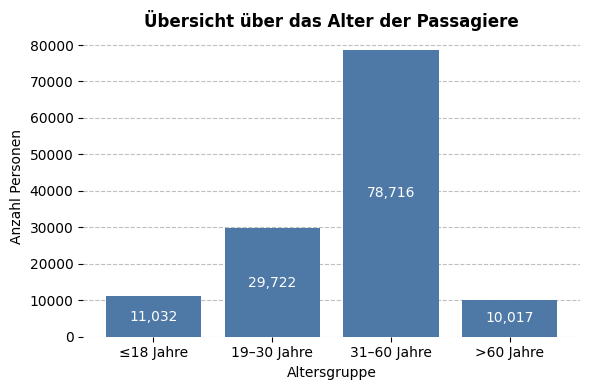

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Neue Altersgruppen definieren
def alter_gruppe(alter):
    if alter <= 18:
        return '≤18 Jahre'
    elif 19 <= alter <= 30:
        return '19–30 Jahre'
    elif 31 <= alter <= 60:
        return '31–60 Jahre'
    else:
        return '>60 Jahre'

df['Altersgruppe'] = df['Age'].apply(alter_gruppe)
gruppen_order = ['≤18 Jahre', '19–30 Jahre', '31–60 Jahre', '>60 Jahre']
counts = df['Altersgruppe'].value_counts().reindex(gruppen_order)
labels = counts.index
values = counts.values

# IBCS-konformer Blauton
color = '#4E79A7'

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=color)

# Titel (Message Title)
ax.set_title('Übersicht über das Alter der Passagiere', fontsize=12, fontweight='bold')

# Achsenbeschriftungen
ax.set_ylabel('Anzahl Personen', fontsize=10)
ax.set_xlabel('Altersgruppe', fontsize=10)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.box(False)

# Beschriftung innerhalb der Balken, zentriert
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2,
            f'{int(val):,}',
            ha='center', va='center',
            fontsize=10, color='white')

plt.tight_layout()
plt.show()


<b>Frage: Wie verteilt sich die Anzahl der Passagiere nach Geschlecht?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur Analyse der Passagierstruktur wurde die Verteilung nach Geschlecht ausgewertet. Dabei zeigt sich eine relativ ausgeglichene Verteilung. Etwa 50.7% der befragten Passagiere sind weiblich, während 49.3% männlich sind. In absoluten Zahlen sind dies 63'784 Männern und 65'703 Frauen bei den insgesamt rund 129'487 erfassten Passagieren.</p>

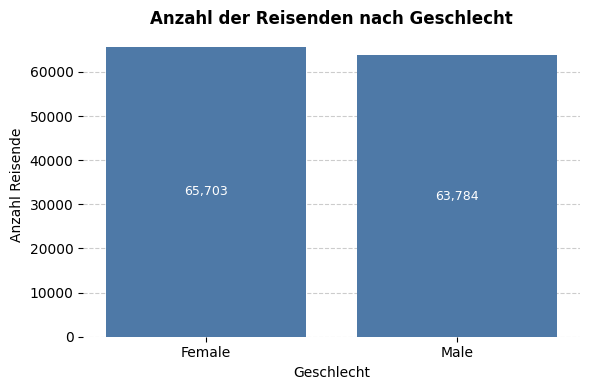

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Anzahl pro Geschlecht zählen
counts = df_zufriedenheit['Gender'].value_counts().sort_index()
labels = counts.index
values = counts.values

# Einfarbiger Blauton für alle Balken (IBCS-konform)
color = '#4E79A7'  # Mittelblau, IBCS-konform

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=color)

# Titel und Achsenbeschriftungen
ax.set_title('Anzahl der Reisenden nach Geschlecht', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl Reisende', fontsize=10)
ax.set_xlabel('Geschlecht', fontsize=10)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.4)

# Balkenbeschriftung innerhalb des Balkens (IBCS-konform)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{int(val):,}',
            ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie verteilen sich die Passagiere auf die Buchungsklassen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Zur Einordnung des Serviceerlebnisses wurde analysiert, wie sich die Passagiere auf die unterschiedlichen Buchungsklassen verteilen. Der Grossteil der Passagiere buchte dabei ein Business- oder Economy-Ticket. Die Economy Plus ist deutlich geringer vertreten. In absoluten Zahlen sind dies 58'117 Passagiere in der Economy, 9'380 Passagiere in der Economy Plus und 61'990 Passagiere in der Business. Unterschiede in der Servicebewertung zwischen den Klassen werden in den Folgeanalysen genauer betrachtet.</p>

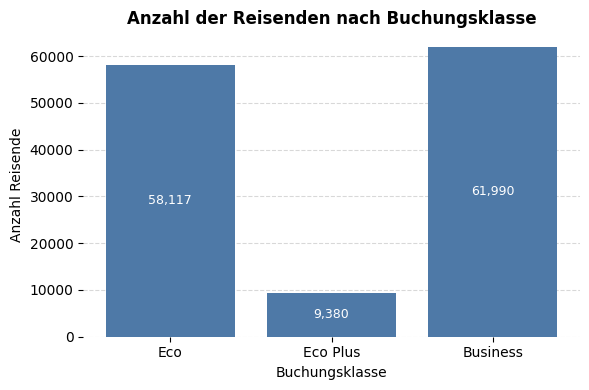

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Reihenfolge der Buchungsklassen festlegen
class_order = ['Eco', 'Eco Plus', 'Business']
counts = df_zufriedenheit['Class'].value_counts()
counts = counts.reindex(class_order)  # Reihenfolge nach festlegen

# Labels und Werte für das Diagramm
labels = counts.index
values = counts.values

# Einfarbiger Blauton für alle Balken (IBCS-konform)
color = '#4E79A7'  # Blau, IBCS-konform

# Erstellen des Diagramms
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=color)

# Titel und Achsenbeschriftungen
ax.set_title('Anzahl der Reisenden nach Buchungsklasse', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl Reisende', fontsize=10)
ax.set_xlabel('Buchungsklasse', fontsize=10)
ax.set_axisbelow(True)

# Gitterlinien in dezentem Grauton
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.3)

# Beschriftungen innerhalb der Balken (IBCS-konform)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{int(val):,}',
            ha='center', va='center', fontsize=9, color='white')

# Layout und Darstellung gemäß IBCS
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie verteilen sich die Reisenden nach Segment?</b>

<p style="font-size: 16px; line-height: 1.5;">
Um ein besseres Verständnis über die Zusammensetzung der Passagiere zu erhalten, wurde die Verteilung der Reisetypen im Datensatz ausgewertet. Dabei zeigt sich, dass 89445 Reisende Geschäftlich unterwegs sind und 40042 privat fliegen, basierend auf den insgesamt 129487 gesammelten Passagierangaben. In Prozentzahlen entpsricht dies rund 69% Geschäftsreisende und 31% Urlaubsreisende.</p>

<p style="font-size: 16px; line-height: 1.5;">
Dies hat Implikationen für die Bewertung von Servicefaktoren, da Geschäftsreisende häufig andere Erwartungen und Prioritäten haben als private Fluggäste. In den folgenden Analysen wird daher unter anderem untersucht, wie sich die Zufriedenheit zwischen beiden Gruppen unterscheidet.</p>

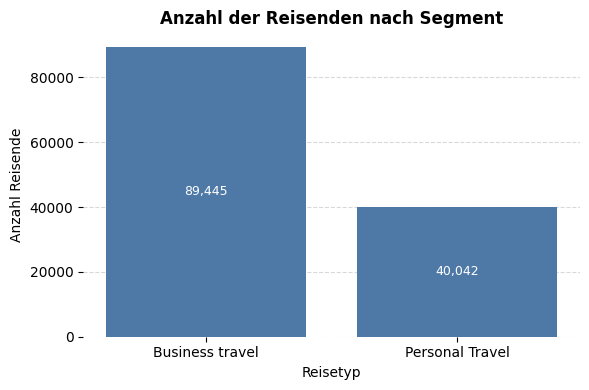

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Absolute Anzahl der Reisetypen zählen
counts = df_zufriedenheit['Type of Travel'].value_counts().sort_index()
labels = counts.index
values = counts.values

# Einheitliche Blautöne (IBCS-konform)
color = '#4E79A7'  # Für Business und Personal

# Erstellen des Balkendiagramms
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=color)

# Titel und Achsenbeschriftungen
ax.set_title('Anzahl der Reisenden nach Segment', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl Reisende', fontsize=10)
ax.set_xlabel('Reisetyp', fontsize=10)
ax.set_axisbelow(True)

# Gitterlinien in dezentem Grauton
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.3)

# Beschriftungen der Balken innerhalb der Balken (IBCS-konform)
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{int(val):,}',
            ha='center', va='center', fontsize=9, color='white')

# Layout und Darstellung gemäß IBCS
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie ist die allgemeine Verteilung der Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Um ein erstes verständis über die allgemeine Zufriedenheit der Passagiere zu erlangen wurde die Verteilung der Bewertungen ausgewertet. Die Analyse hat dabei ergeben, dass rund 45% der befragten Passagiere unzufrieden mit ihren Erfahrungen während des Fluges waren, während etwa 55% der Passagiere zufrieden waren. Das sind bei den rund 129.100 Passagierbewertungen die für diese Analyse berücksichtigt wurden, rund 58.500 Passagiere die nicht zufrieden waren. Die Verteilung ist damit nicht vollständig ausgewogen, hat aber dennoch kein zu starkes Ungleichgewicht. Der vergleichsweise hohe Anteil unzufriedener Passagiere kann auf konkrete Schwachstellen im Service hinweisen und wird in den folgenden Analysen weiter untersucht.</p>

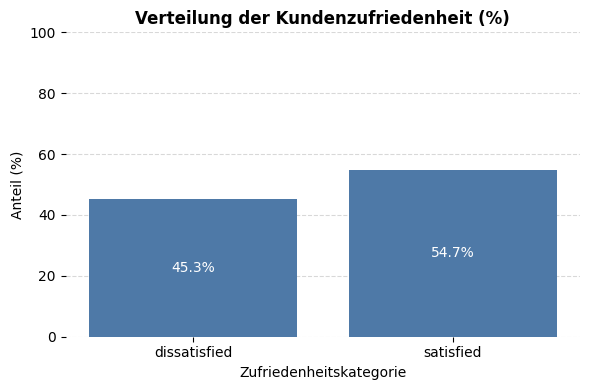

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Prozentuale Verteilung berechnen
counts = df_zufriedenheit['satisfaction'].value_counts(normalize=True).sort_index() * 100
labels = counts.index
values = counts.values

# IBCS-konformer Plot (in Prozent)
fig, ax = plt.subplots(figsize=(6, 4))

# Einheitliche Farbauswahl, IBCS-konform
color = '#4E79A7'

# Balkendiagramm
bars = ax.bar(labels, values, color=color)

# Achsenbeschriftung und Layout
ax.set_title('Verteilung der Kundenzufriedenheit (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Anteil (%)', fontsize=10)
ax.set_xlabel('Zufriedenheitskategorie', fontsize=10)
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.3)

# Beschriftung mittig im Balken
for bar, val in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{val:.1f}%',
        ha='center',
        va='center',
        fontsize=10,
        color='white'
    )

plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Gibt es signifikante Unterschiede in der Kundenzufriedenheit zwischen Economy-, Eco Plus und Business-Class-Passagieren?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel dieser Frage besteht darin zu analysieren, ob bestimmte Buchungsklassen einen höheren Anteil unzufriedener Kunden aufweisen.

Das untenstehende Balkendiagramm zeigt Unterschiede in den Zufriedenheitswerten zwischen den Buchungsklassen. Passagiere der Business Class geben mit 71% häufiger eine positive Bewertung ab als Reisende der Economy Class (39%) und Eco Plus Class (43%).

Die Zufriedenheitsraten in der Economy- und Eco Plus Class liegen damit unter dem Niveau der Business Class. Dies könnte auf Unterschiede im Serviceangebot oder in den Reiseerwartungen in den jeweiligen Buchungsklassen hinweisen.</p>

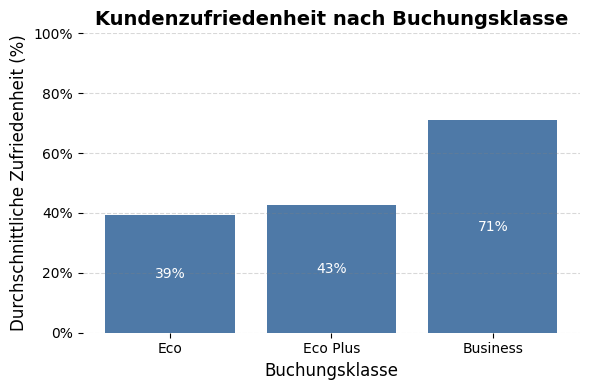

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)

# Zufriedenheit in numerische Werte umwandeln
df_zufriedenheit["satisfaction"] = df_zufriedenheit["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Durchschnittliche Zufriedenheit pro Klasse
class_satisfaction = df_zufriedenheit.groupby("Class")["satisfaction"].mean().sort_values()

# IBCS-konforme Visualisierung
fig, ax = plt.subplots(figsize=(6, 4))

# Einfache, einheitliche Farbwahl
color = "#4E79A7"  # Ein konsistenter Blauton

# Balkendiagramm erstellen
bars = ax.bar(class_satisfaction.index, class_satisfaction.values, color=color)

# Prozentangaben auf den Balken anzeigen (im Balken)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f"{height:.0%}",
            ha='center', va='center', fontsize=10, color="white")

# Achsenbeschriftungen und Titel
ax.set_ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
ax.set_xlabel("Buchungsklasse", fontsize=12)
ax.set_title("Kundenzufriedenheit nach Buchungsklasse", fontsize=14, weight='bold')

# Y-Achse als Prozent anzeigen
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0, 1)

# Dezente Hilfslinien nur auf der y-Achse
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.3)

# IBCS-konformes Layout ohne Rand und überflüssige Elemente
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie unterscheidet sich die Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel dieser Frage ist es, die Zufriedenheit zwischen Geschäftsreisenden und Urlaubsreisenden zu vergleichen, um in späteren Analysen mögliche Unterschiede in den Erfahrungen während der Reise und den Servicebewertungen der beiden Gruppen zu identifizieren.</p>

<p style="font-size: 16px; line-height: 1.5;">Das folgende Balkendiagramm stellt die Zufriedenheitsraten beider Gruppen dar. Geschäftsreisende weisen eine Zufriedenheitsrate von 58% auf, während Urlaubsreisende eine Rate von 46% erreichen. Der Unterschied von 12 Prozentpunkten kann auf unterschiedliche Erwartungen oder Erfahrungen während der Reise hindeuten.</p>

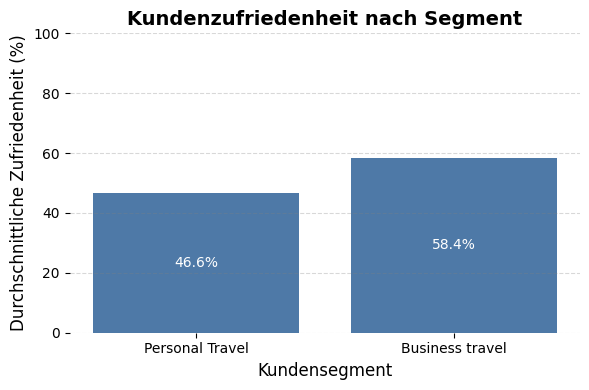

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)

# Umwandlung der Zufriedenheits-Spalte
df_zufriedenheit["satisfaction"] = df_zufriedenheit["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Durchschnittliche Zufriedenheit pro Kundensegment berechnen
segment_satisfaction = df_zufriedenheit.groupby("Type of Travel")["satisfaction"].mean().sort_values() * 100  # in %

# IBCS-gerechte Visualisierung
fig, ax = plt.subplots(figsize=(6, 4))

# Beide Balken in demselben Blauton
bars = ax.bar(segment_satisfaction.index, segment_satisfaction.values,
              color="#4E79A7")  # Der gleiche Blauton für beide Balken

# Werte direkt in der Mitte des Balkens anzeigen
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height / 2, f"{height:.1f}%",
            ha='center', va='center', fontsize=10, color="white")  # Beschriftung in der Mitte, weiß

# Titel & Achsenbeschriftungen (IBCS-konform)
ax.set_ylabel("Durchschnittliche Zufriedenheit (%)", fontsize=12)
ax.set_xlabel("Kundensegment", fontsize=12)
ax.set_title("Kundenzufriedenheit nach Segment", fontsize=14, weight='bold')

# Y-Achse als Prozent darstellen
ax.set_ylim(0, 100)  # Skala von 0% bis 100%

# Dezente Hilfslinien
ax.grid(axis='y', linestyle="--", color="gray", alpha=0.3)

# Layout anpassen
plt.tight_layout()
plt.box(False)  # Keine Rahmen
plt.show()


<b>Frage: Gibt es einen Zusammenhang zwischen Alter und Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel dieser Frage ist es, zu untersuchen, ob ein Zusammenhang zwischen dem Alter der Fluggäste und ihrer Zufriedenheit besteht. Im Fokus steht die Frage, ob sich die Zufriedenheit zwischen verschiedenen Altersgruppen unterscheidet.</p>

<p style="font-size: 16px; line-height: 1.5;">Die Analyse zeigt, dass die Verteilung der Zufriedenheit in den Altersgruppen variiert. In der Gruppe der jüngeren Passagiere (≤30 Jahre) liegt der Anteil unzufriedener Personen bei 55,6%, während 44,4% dieser Gruppe zufrieden sind. In der Altersgruppe der 31–60-Jährigen liegt der Anteil zufriedener Personen bei 61,5%, der Anteil unzufriedener bei 38,5%. Bei den älteren Passagieren (>60 Jahre) beträgt der Anteil der Zufriedenen 43,8%, während 56,2% unzufrieden sind.</p>

<p style="font-size: 16px; line-height: 1.5;">Diese Ergebnisse deuten darauf hin, dass in der untersuchten Stichprobe die Zufriedenheit bei Fluggästen im Alter zwischen 31 und 60 Jahren höher ausfällt als bei jüngeren und älteren Personen.</p>

<ipython-input-27-0994d91aa77b>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_zufriedenheit.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0)


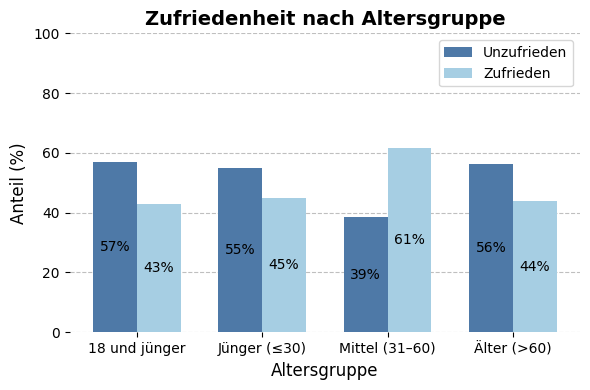

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Altersgruppen definieren (inklusive "18 und jünger")
bins = [0, 18, 30, 60, 100]  # Neue Grenze für 18 und jünger
labels = ['18 und jünger', 'Jünger (≤30)', 'Mittel (31–60)', 'Älter (>60)']
df_zufriedenheit['age_group'] = pd.cut(df_zufriedenheit['Age'], bins=bins, labels=labels, right=True)

# Gruppieren: Anteil der Zufriedenen pro Altersgruppe
grouped = df_zufriedenheit.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0)

# Umrechnung in Prozent
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# IBCS-konformer Plot (Balken nebeneinander, nicht gestapelt)
fig, ax = plt.subplots(figsize=(6, 4))

# Berechnete Positionen der Balken für nebeneinander
x = np.arange(len(grouped_percent.index))  # Altersgruppen auf der x-Achse
width = 0.35  # Breite der Balken

# Balken nebeneinander, hellblau für Zufriedene, dunkelblau für Unzufriedene
bars1 = ax.bar(x - width/2, grouped_percent['dissatisfied'], width, label='Unzufrieden', color='#4E79A7')  # Dunkelblau
bars2 = ax.bar(x + width/2, grouped_percent['satisfied'], width, label='Zufrieden', color='#A6CEE3')  # Hellblau

# Titel & Achsenbeschriftungen (IBCS-konform)
ax.set_title('Zufriedenheit nach Altersgruppe', fontsize=14, fontweight='bold')
ax.set_ylabel('Anteil (%)', fontsize=12)
ax.set_xlabel('Altersgruppe', fontsize=12)
ax.set_ylim(0, 100)  # Skala von 0 bis 100 Prozent
ax.set_xticks(x)  # Setze die Position der X-Achse für jede Altersgruppe
ax.set_xticklabels(grouped_percent.index)  # Setze die Labels der Altersgruppen
ax.set_axisbelow(True)

# Grid-Linien
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Beschriftungen innerhalb der Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2 if bar.get_y() == 0 else bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=10, color="black")

# Legende anzeigen
ax.legend()

# Layout anpassen und unnötige Ränder entfernen
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie unterscheidet sich die Zufriedenheit je nach Flugdistanz?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel dieser Frage besteht darin zu untersuchen, ob die Flugdistanz einen Zusammenhang mit der Zufriedenheit der Passagiere aufweist. Dabei wird zwischen Kurz-, Mittel- und Langstreckenflügen unterschieden.</p>

<p style="font-size: 16px; line-height: 1.5;">Die Analyse zeigt, dass sich die Zufriedenheitswerte je nach Flugdistanz unterscheiden. Bei Kurzstreckenflügen (≤800 km) liegt die Zufriedenheitsrate bei 75%. Für Mittelstreckenflüge (801–1600 km) beträgt sie 52%, während sie bei Langstreckenflügen (>1600 km) mit 51% auf einem ähnlichen Niveau liegt.</p>

<p style="font-size: 16px; line-height: 1.5;">Diese Verteilung legt nahe, dass die Zufriedenheit tendenziell mit zunehmender Flugdistanz abnimmt. Mögliche Erklärungsansätze, wie beispielsweise veränderte Erwartungen an Service, Komfort oder Ausstattung bei längeren Flügen, könnten in weiterführenden Analysen geprüft werden.</p>

<p style="font-size: 16px; line-height: 1.5;">Insgesamt zeigen die vorliegenden Daten, dass Passagiere auf kürzeren Flugstrecken häufiger zufrieden waren als auf mittleren und langen Distanzen.</p>

<ipython-input-29-697e39f82981>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_zufriedenheit.groupby(['flight_group', 'satisfaction']).size().unstack(fill_value=0)


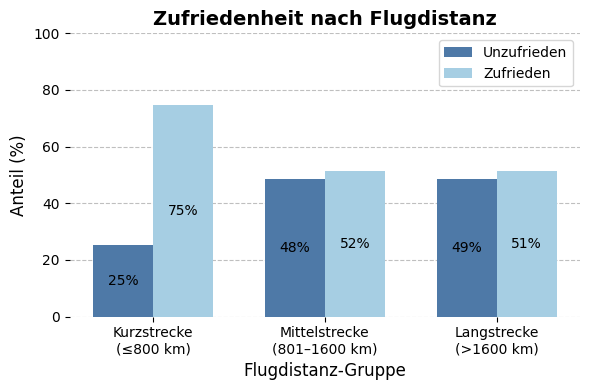

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Gruppen nach Flugdistanz (anpassbare Schwellenwerte)
bins = [0, 800, 1600, df_zufriedenheit['Flight Distance'].max()]
labels = ['Kurzstrecke\n(≤800 km)', 'Mittelstrecke\n(801–1600 km)', 'Langstrecke\n(>1600 km)']
df_zufriedenheit['flight_group'] = pd.cut(df_zufriedenheit['Flight Distance'], bins=bins, labels=labels, right=True)

# Gruppieren: Anteil Zufriedene vs. Unzufriedene je Fluggruppe
grouped = df_zufriedenheit.groupby(['flight_group', 'satisfaction']).size().unstack(fill_value=0)

# In Prozent umwandeln
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# IBCS-konformer Plot: Balken nebeneinander (nicht gestapelt)
fig, ax = plt.subplots(figsize=(6, 4))

# Berechnete Positionen der Balken für nebeneinander
x = np.arange(len(grouped_percent.index))  # Flugdistanz-Gruppen auf der x-Achse
width = 0.35  # Breite der Balken

# Balken nebeneinander: Dunkelblau für 'Unzufrieden', Hellblau für 'Zufrieden'
bars1 = ax.bar(x - width/2, grouped_percent['dissatisfied'], width, label='Unzufrieden', color='#4E79A7')  # Dunkelblau
bars2 = ax.bar(x + width/2, grouped_percent['satisfied'], width, label='Zufrieden', color='#A6CEE3')  # Hellblau

# Titel & Achsenbeschriftungen (IBCS-konform)
ax.set_title('Zufriedenheit nach Flugdistanz', fontsize=14, fontweight='bold')
ax.set_ylabel('Anteil (%)', fontsize=12)
ax.set_xlabel('Flugdistanz-Gruppe', fontsize=12)
ax.set_ylim(0, 100)  # Skala von 0 bis 100 Prozent
ax.set_xticks(x)  # Setze die Position der X-Achse für jede Flugdistanz-Gruppe
ax.set_xticklabels(grouped_percent.index)  # Setze die Labels der Flugdistanz-Gruppen
ax.set_axisbelow(True)

# Grid-Linien
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Beschriftungen innerhalb der Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2 if bar.get_y() == 0 else bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=10, color="black")

# Legende anzeigen
ax.legend()

# Layout anpassen und unnötige Ränder entfernen
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie beeinflusst die Verspätung die Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel dieser Frage ist es zu untersuchen, ob und in welchem Ausmass Abflugverspätungen mit der Zufriedenheit der Passagiere in Zusammenhang stehen. Verspätungen stellen einen häufigen Bestandteil des Reisealltags dar und könnten Einfluss auf die Bewertung des Flugerlebnisses nehmen.</p>

<p style="font-size: 16px; line-height: 1.5;">Für die Analyse wurden die Abflugverspätungen in vier Kategorien unterteilt: pünktlich, geringe Verspätung (1–15 Minuten), mittlere Verspätung (16–60 Minuten) und hohe Verspätung (über 60 Minuten).</p>

<p style="font-size: 16px; line-height: 1.5;">Die Ergebnisse zeigen, dass die Zufriedenheit der Passagiere mit zunehmender Abflugverspätung tendenziell abnimmt. Bei pünktlichen Flügen liegt die Zufriedenheitsrate bei 57%. Bei geringen Verspätungen (1–15 Minuten) beträgt sie 55%. Bei mittleren Verspätungen (16–60 Minuten) sinkt sie auf 50%, und bei hohen Verspätungen (über 60 Minuten) liegt sie bei 44%.</p>

<p style="font-size: 16px; line-height: 1.5;">Diese Verteilung legt nahe, dass längere Abflugverspätungen mit einer niedrigeren Zufriedenheit der Passagiere einhergehen. Ob und in welchem Umfang weitere Faktoren diesen Zusammenhang beeinflussen, kann in ergänzenden Analysen untersucht werden.</p>

<ipython-input-31-4f3243ebc84a>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_zufriedenheit.groupby(['delay_category', 'satisfaction']).size().unstack(fill_value=0)


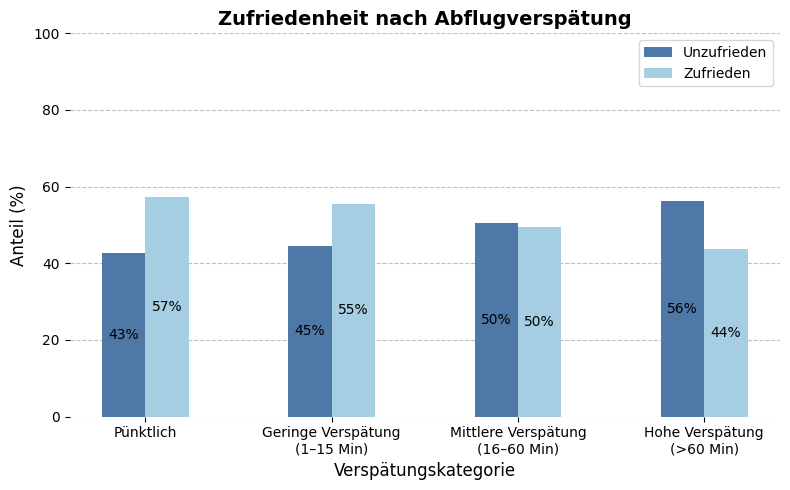

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df_zufriedenheit = pd.read_csv(url)
df_zufriedenheit.dropna(inplace=True)

# Verspätungskategorien definieren
bins = [-1, 0, 15, 60, df_zufriedenheit['Departure Delay in Minutes'].max()]
labels = ['Pünktlich',
          'Geringe Verspätung\n(1–15 Min)',
          'Mittlere Verspätung\n(16–60 Min)',
          'Hohe Verspätung\n(>60 Min)']
df_zufriedenheit['delay_category'] = pd.cut(df_zufriedenheit['Departure Delay in Minutes'], bins=bins, labels=labels)

# Gruppieren nach Verspätungskategorie und Zufriedenheit
grouped = df_zufriedenheit.groupby(['delay_category', 'satisfaction']).size().unstack(fill_value=0)

# In Prozent umrechnen
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reihenfolge der Kategorien sicherstellen
order = labels
grouped_percent = grouped_percent.loc[order]

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(grouped_percent.index)) * 1.5  # Position der Balken

width = 0.35  # Breite der Balken

# Balken nebeneinander: Dunkelblau für 'Unzufrieden', Hellblau für 'Zufrieden'
bars1 = ax.bar(x - width/2, grouped_percent['dissatisfied'], width, label='Unzufrieden', color='#4E79A7')  # Dunkelblau
bars2 = ax.bar(x + width/2, grouped_percent['satisfied'], width, label='Zufrieden', color='#A6CEE3')  # Hellblau

# Achsen & Beschriftung
ax.set_title('Zufriedenheit nach Abflugverspätung', fontsize=14, fontweight='bold')
ax.set_ylabel('Anteil (%)', fontsize=12)
ax.set_xlabel('Verspätungskategorie', fontsize=12)
ax.set_ylim(0, 100)  # Skala von 0 bis 100 Prozent
ax.set_xticks(x)  # Position der X-Achse
ax.set_xticklabels(order, fontsize=10)  # Setze die Labels der Verspätungskategorien
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Prozentwerte auf Balken (IBCS-konform)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=10, color="black")

# Legende
ax.legend()

# Layout anpassen und unnötige Ränder entfernen
plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Wie unterscheiden sich Zufriedenheitswerte bei verspäteter Ankunft im Vergleich zur geplanten Ankunft?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel dieser Frage ist es herauszufinden, wie sich die Zufriedenheit der Passagiere unterscheidet, bei Flügen die pünktlich oder verspätet ankommen.</p>

<p style="font-size: 16px; line-height: 1.5;">Die Analyse zeigt einen starken Unterschied zwischen den pünktlich und den verspätet ankommenden Flügen. 59% der Passagiere waren zufrieden, wenn ihr Flug pünktlich ankam. Im Gegensatz dazu sank die Zufriedenheit der Passagiere die Verspätet ankamen auf nur 50%. Das bedeutet, dass die Zufriedenheit bei einer verspäteten Ankunft 9% niedriger ist.</p>

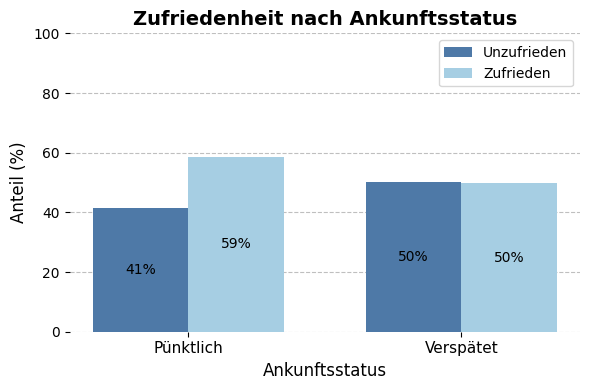

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit als binär kodieren (Zufrieden: 1, Unzufrieden: 0)
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Ankunftsstatus bestimmen
df['arrival_status'] = df['Arrival Delay in Minutes'].apply(lambda x: 'Pünktlich' if x == 0 else 'Verspätet')

# Gruppieren und in Prozent umrechnen
grouped = df.groupby(['arrival_status', 'satisfaction_binary']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(len(grouped_percent.index))
width = 0.35

bars1 = ax.bar(x - width/2, grouped_percent[0], width, label='Unzufrieden', color='#4E79A7')  # Dunkelblau
bars2 = ax.bar(x + width/2, grouped_percent[1], width, label='Zufrieden', color='#A6CEE3')    # Hellblau

# Achsen & Layout
ax.set_title('Zufriedenheit nach Ankunftsstatus', fontsize=14, fontweight='bold')
ax.set_ylabel('Anteil (%)', fontsize=12)
ax.set_xlabel('Ankunftsstatus', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(grouped_percent.index, fontsize=11)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)
ax.legend(loc='upper right')
plt.box(False)

# Prozentwerte zentriert
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.0f}%', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


<b>Frage: Wie wirkt sich die Qualität der Serviceleistungen auf die Zufriedenheit der Passagiere aus?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel dieser Frage ist es, herauszufinden, wie die Bewertungen einzelner Services mit der allgemeinen Zufriedenheit der Passagiere zusammenhängt. Mit dieser Frage sollte auch identifiziert werden, ob eine gute oder schlechte Bewertung bestimmter Services einen klaren Einfluss auf die Zufrieden der Passagiere hat.

Um diese Frage zu beantworten wurden verschiedene Services, wie Sitzkomfort, WLAN, Essen und Getränke, Unterhaltung, Sauberkeit und Online-Boarding, anhand ihrer Bewertung durch die Passagiere in zwei Gruppen eingeteilt: schlecht bewertet (<3) und gut bewertet (≥3).

Die Ergebnisse zeigen einen klaren Zusammenhang zwischen einer guten Servicebewertung und der Zufriedenheit der Passagiere. Die Analyse unterstreicht damit wie wichtig qualitativ hochwertige Services für die Zufriedenheit der Passagiere sind.
</p>

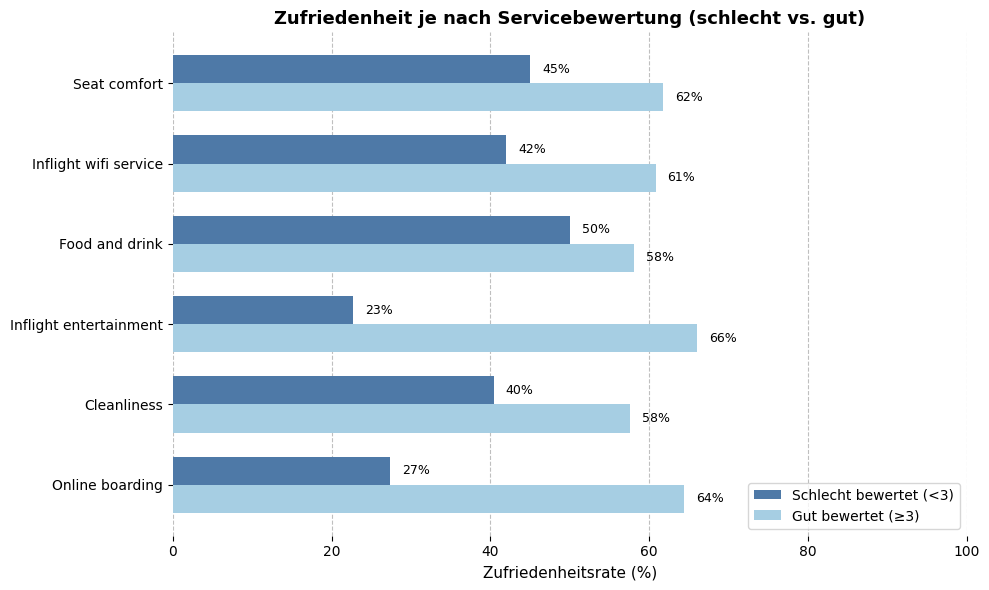

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Services
features = [
    'Seat comfort',
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Cleanliness',
    'Online boarding'
]

results = []

for feature in features:
    df[f'{feature}_group'] = df[feature].apply(lambda x: 'Schlecht (<3)' if x < 3 else 'Gut (≥3)')
    grouped = df.groupby(f'{feature}_group')['satisfaction_binary'].mean() * 100
    results.append({
        'Feature': feature,
        'Schlecht': grouped.get('Schlecht (<3)', 0),
        'Gut': grouped.get('Gut (≥3)', 0)
    })

# DataFrame
plot_df = pd.DataFrame(results).set_index('Feature')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(plot_df))

bars1 = ax.barh([i - bar_width/2 for i in x], plot_df['Schlecht'], height=bar_width,
                label='Schlecht bewertet (<3)', color='#4E79A7')  # Dunkelblau
bars2 = ax.barh([i + bar_width/2 for i in x], plot_df['Gut'], height=bar_width,
                label='Gut bewertet (≥3)', color='#A6CEE3')        # Hellblau

# Achsen & Layout
ax.set_yticks(x)
ax.set_yticklabels(plot_df.index, fontsize=10)
ax.set_xlabel('Zufriedenheitsrate (%)', fontsize=11)
ax.set_title('Zufriedenheit je nach Servicebewertung (schlecht vs. gut)', fontsize=13, fontweight='bold')
ax.set_xlim(0, 100)
ax.invert_yaxis()  # Wichtigste Services oben
ax.grid(axis='x', linestyle='--', color='grey', alpha=0.5)
ax.set_axisbelow(True)
plt.box(False)
plt.legend(loc='lower right')

# Prozentwerte am Ende jedes Balkens
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1.5, bar.get_y() + bar.get_height()/2, f'{width:.0f}%',
                va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


<b>Frage: Wie unterscheidet sich die Zufriedenheit bei guter bzw. schlechter Serviceleistung, aufgeteilt auf Reiseklasse?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel dieser Frage war es herauszufinden wie die Bewertung einzelner Services die Zufriedenheit der Passagiere beeinflusst und ob sich Unterschiede zwischen den einzelnen Reiseklassen herausstellen.

In allen drei Reiseklassen ist ein klarer Trend erkennbar, gute Bewertungen bei den einzelnen Services gehen immer mit einer höheren Zufrieden der Passagiere einher. Dadurch lässt sich bestätigen das ziwschen der wahrgenommenen Servicequalität und der Gesamtzufriedenheit ein Zusammenhang besteht.

In der Business Class sind die Zufriedenheitswerte der Passagiere am höchsten, besonders dann wenn die Services gut bewertet wurden. Schlechte Bewertungen wirken sich hier ebenfalls stark negativ aus, allerdings ist der Unterschied weniger extrem als in der Economy Class.

In der Economy Class sind die Passagiere allgemein weniger Zufrieden, vor allem bei wenn die Services auch noch schlecht bewertetet wurden. Das weist daraufhin das die Passagiere in dieser Klasse möglicherweise empfindlicher gegenüber der Servicequalität sind.

Die Economy Plus-Klasse liegt zwischen den beiden anderen Klassen – sowohl bei den guten als auch den schlechten Bewertungen.

</p>

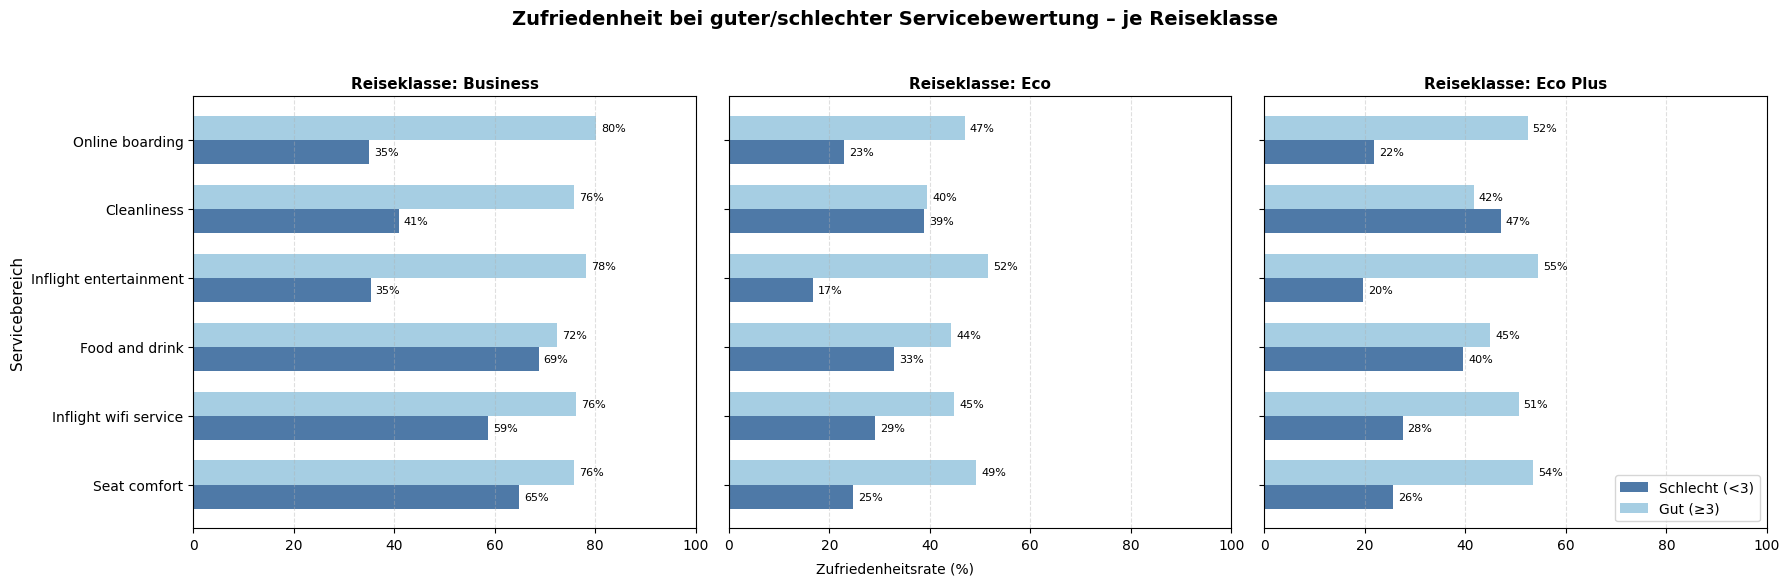

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Nur relevante Klassen
df = df[df['Class'].isin(['Business', 'Eco', 'Eco Plus'])]

# Service-Features
features = [
    'Seat comfort',
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Cleanliness',
    'Online boarding'
]

# Daten vorbereiten
results = []
for feature in features:
    df[f'{feature}_group'] = df[feature].apply(lambda x: 'Schlecht (<3)' if x < 3 else 'Gut (≥3)')
    for cls in ['Business', 'Eco', 'Eco Plus']:
        for grp in ['Schlecht (<3)', 'Gut (≥3)']:
            subset = df[(df['Class'] == cls) & (df[f'{feature}_group'] == grp)]
            if len(subset) > 0:
                satisfaction_rate = subset['satisfaction_binary'].mean() * 100
                results.append({
                    'Feature': feature,
                    'Bewertung': grp,
                    'Klasse': cls,
                    'Zufriedenheitsrate': satisfaction_rate
                })

plot_df = pd.DataFrame(results)

# Farben nach IBCS-Stil (hell- und dunkelblau für positiv/negativ)
farben = {
    'Schlecht (<3)': '#4E79A7',      # dunkelblau
    'Gut (≥3)': '#A6CEE3'  # hellblau
}

# Subplots pro Klasse
klassen = ['Business', 'Eco', 'Eco Plus']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, klasse in zip(axes, klassen):
    subset = plot_df[plot_df['Klasse'] == klasse]

    # Y-Achsenpositionen
    y_pos = np.arange(len(features))
    bar_width = 0.35

    # Balkenwerte
    schlecht = subset[subset['Bewertung'] == 'Schlecht (<3)']['Zufriedenheitsrate'].values
    gut = subset[subset['Bewertung'] == 'Gut (≥3)']['Zufriedenheitsrate'].values

    # Balken
    ax.barh(y_pos - bar_width/2, schlecht, height=bar_width, color=farben['Schlecht (<3)'], label='Schlecht (<3)')
    ax.barh(y_pos + bar_width/2, gut, height=bar_width, color=farben['Gut (≥3)'], label='Gut (≥3)')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features, fontsize=10)
    ax.set_title(f'Reiseklasse: {klasse}', fontsize=11, fontweight='bold')
    ax.set_xlim(0, 100)
    ax.grid(axis='x', linestyle='--', alpha=0.4)
    if ax == axes[0]:
        ax.set_ylabel('Servicebereich', fontsize=11)

    # Werte auf Balken
    for val, ypos in zip(schlecht, y_pos - bar_width/2):
        ax.text(val + 1, ypos, f'{val:.0f}%', va='center', fontsize=8)
    for val, ypos in zip(gut, y_pos + bar_width/2):
        ax.text(val + 1, ypos, f'{val:.0f}%', va='center', fontsize=8)

# Gemeinsame X-Achsenbeschriftung und Titel
fig.text(0.5, 0.04, 'Zufriedenheitsrate (%)', ha='center')
fig.suptitle('Zufriedenheit bei guter/schlechter Servicebewertung – je Reiseklasse', fontsize=14, fontweight='bold')
axes[2].legend(loc='lower right')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


<b>Frage: Welche Bordservices (z. B. WLAN, Entertainment, Essen & Trinken) haben den größten Einfluss auf die Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Das Ziel ist die Identifikation von Servicebereichen, die verbessert werden sollten, um eine höhere Zufriedenheit zu erreichen.

Inflight Entertainment zeigt den grössten Unterschied in der Bewertung zwischen zufriedenen und unzufriedenen Kunden mit einem Delta von +1.41 und damit auch den grössten Einflussfaktor der Bordservices auf die Zufriedenheit.

Der Seat Comfort ist ebenfalls ein bedeutender Zufriedenheitsfaktor mit einem Delta von +0.68, Komfort spielt eine zentrale Rolle.

Inflight Wifi Service hat einen mittleren Einfluss mit einem Delta von +0.60, eine stabile Internetverbindung wird also geschätzt.

Food and Drink weist nur einen geringen Unterschied von Delta +0.35 auf, weniger entscheidend für die Gesamtzufriedenheit.

</p>

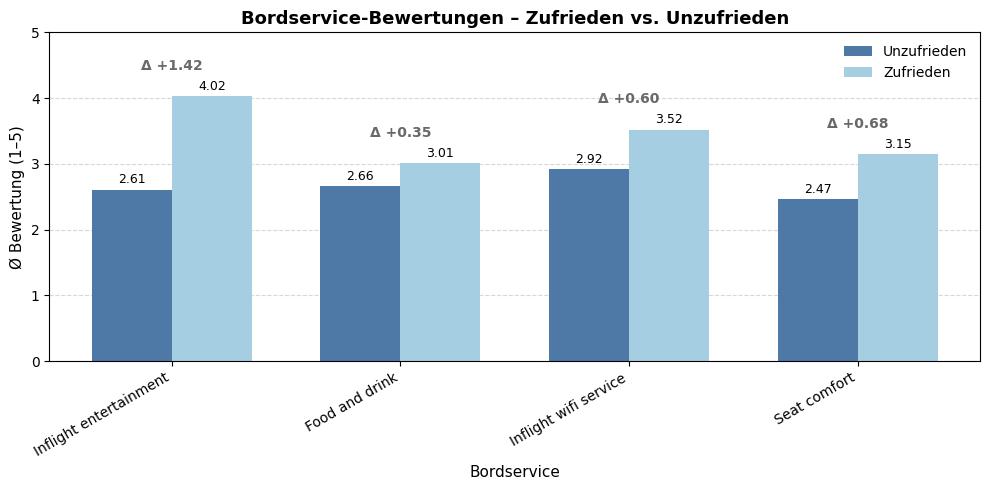

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# Bordservices
services = ['Inflight entertainment', 'Food and drink', 'Inflight wifi service', 'Seat comfort']

# Durchschnittswerte berechnen
grouped = df.groupby("satisfaction")[services].mean()
delta = grouped.loc[1] - grouped.loc[0]

# Plot-Vorbereitung
x = np.arange(len(services))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

# Farben nach IBCS
farben = {
    0: '#4E79A7',  # Unzufrieden – dunkles Blau
    1: '#A6CEE3'   # Zufrieden – helles Blau
}

# Balken
bars_unsat = ax.bar(x - bar_width/2, grouped.loc[0], width=bar_width, color=farben[0], label='Unzufrieden')
bars_sat = ax.bar(x + bar_width/2, grouped.loc[1], width=bar_width, color=farben[1], label='Zufrieden')

# Werte auf Balken
for bars in [bars_unsat, bars_sat]:
    for bar in bars:
        val = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.05, f'{val:.2f}',
                ha='center', va='bottom', fontsize=9)

# Delta-Werte
for i, s in enumerate(services):
    d = delta[s]
    max_val = max(grouped.loc[0, s], grouped.loc[1, s])
    ax.text(x[i], max_val + 0.4, f'Δ {d:+.2f}', ha='center', fontsize=10, fontweight='bold', color='dimgray')

# Layout & Stil gemäß IBCS
ax.set_xticks(x)
ax.set_xticklabels(services, rotation=30, ha='right')
ax.set_ylim(0, 5)
ax.set_ylabel('Ø Bewertung (1–5)', fontsize=11)
ax.set_xlabel('Bordservice', fontsize=11)
ax.set_title('Bordservice-Bewertungen – Zufrieden vs. Unzufrieden', fontsize=13, weight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
ax.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()


<b>Frage: Hängt die Zufriedenheit systematisch mit der Bewertung des Check-in-Services zusammen?</b>

<p style="font-size: 16px; line-height: 1.5;">
Die Analyse zeigt einen klaren Zusammenhang zwischen der Bewertung des Check-in-Services und der allgemeinen Zufriedenheit. Bei einer sehr niedrigen Bewertung des Check-in-Services (0) sind alle Befragten unzufrieden. Mit steigender Bewertung nimmt der Anteil zufriedener Kunden kontinuierlich zu. Bei einer Bewertung von 3 sind bereits 57% der Kunden zufrieden. Ab einer Bewertung von 5 liegt der Anteil zufriedener Kunden bei 74%.

Dieses Ergebnis deutet darauf hin, dass der Check-in-Prozess einen relevanten Einfluss auf die Gesamtzufriedenheit hat. Da der Check-in häufig den ersten direkten Kontakt mit der Airline darstellt, könnte ein positiver Verlauf dieses Prozesses den weiteren Reiseverlauf positiv beeinflussen.

</p>

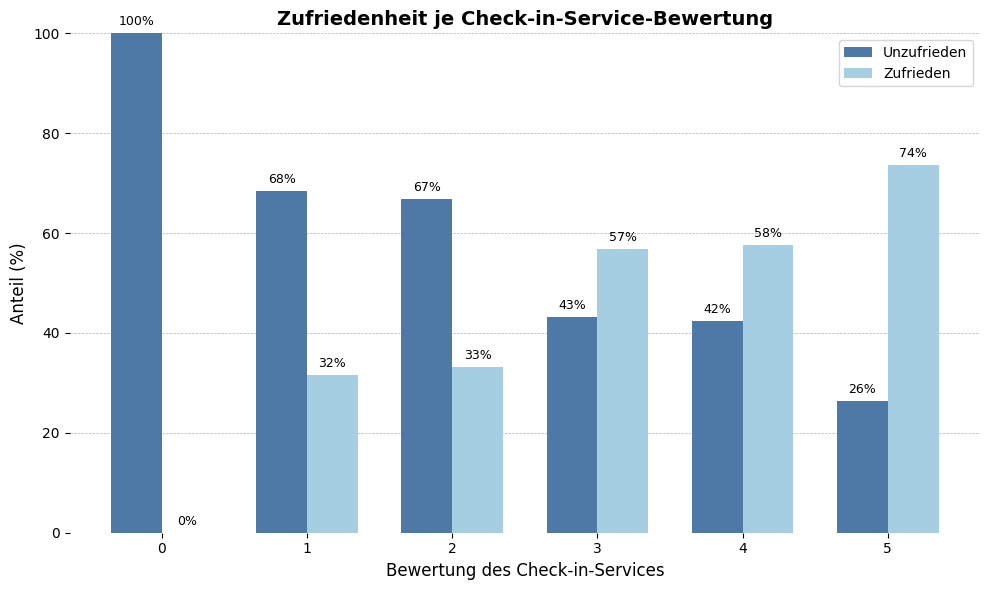

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten einlesen und bereinigen
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 'Zufrieden' if x == 'satisfied' else 'Unzufrieden')

# Gruppieren nach Check-in Service und Zufriedenheit
grouped = df.groupby(['Checkin service', 'satisfaction_binary']).size().unstack(fill_value=0)

# In Prozent umrechnen
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot-Vorbereitung
x = np.arange(len(grouped_percent.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, grouped_percent['Unzufrieden'], width, label='Unzufrieden', color='#4E79A7')
bars2 = ax.bar(x + width/2, grouped_percent['Zufrieden'], width, label='Zufrieden', color='#A6CEE3')

# Achsen & Layout
ax.set_title('Zufriedenheit je Check-in-Service-Bewertung', fontsize=14, weight='bold')
ax.set_xlabel('Bewertung des Check-in-Services', fontsize=12)
ax.set_ylabel('Anteil (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(grouped_percent.index)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
ax.set_axisbelow(True)
plt.legend(loc='upper right', fontsize=10)

# Prozentwerte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.0f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.box(False)
plt.show()


<b>Frage: Hat Sitzkomfort auf Langstrecken einen grösseren Einfluss auf die Zufriedenheit als auf Kurzstrecken?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel der Analyse ist es, den Einfluss des Sitzkomforts auf die Zufriedenheit in Abhängigkeit von der Flugdauer zu untersuchen.

Die Analyse zeigt, dass der Sitzkomfort sowohl auf Kurz- als auch auf Langstrecken einen deutlichen Einfluss auf die Zufriedenheit hat. Bei sehr niedrigem Sitzkomfort (Bewertung 0) liegt der Zufriedenheitsanteil auf Kurzstrecken bei 100%, während er auf Mittel- und Langstrecken nur bei rund 39% bzw. 41,6% liegt.

Bei hohem Sitzkomfort (Bewertung 5) liegt der Zufriedenheitsanteil auf allen Distanzen bei etwa 99%.

Die Ergebnisse deuten darauf hin, dass der Einfluss des Sitzkomforts mit zunehmender Flugdauer stärker wahrgenommen wird. Während auf Kurzstrecken auch bei niedrigem Komfort noch relativ hohe Zufriedenheitswerte erreicht werden, sinkt die Zufriedenheit bei Mittel- und Langstrecken bei geringem Sitzkomfort deutlich.

Der Sitzkomfort ist somit insbesondere bei längeren Flügen ein relevanter Faktor für die Kundenzufriedenheit.
</p>

<ipython-input-52-ac8ff0ab9b0e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['flight_group', 'Seat comfort', 'satisfaction_binary']).size().unstack(fill_value=0)


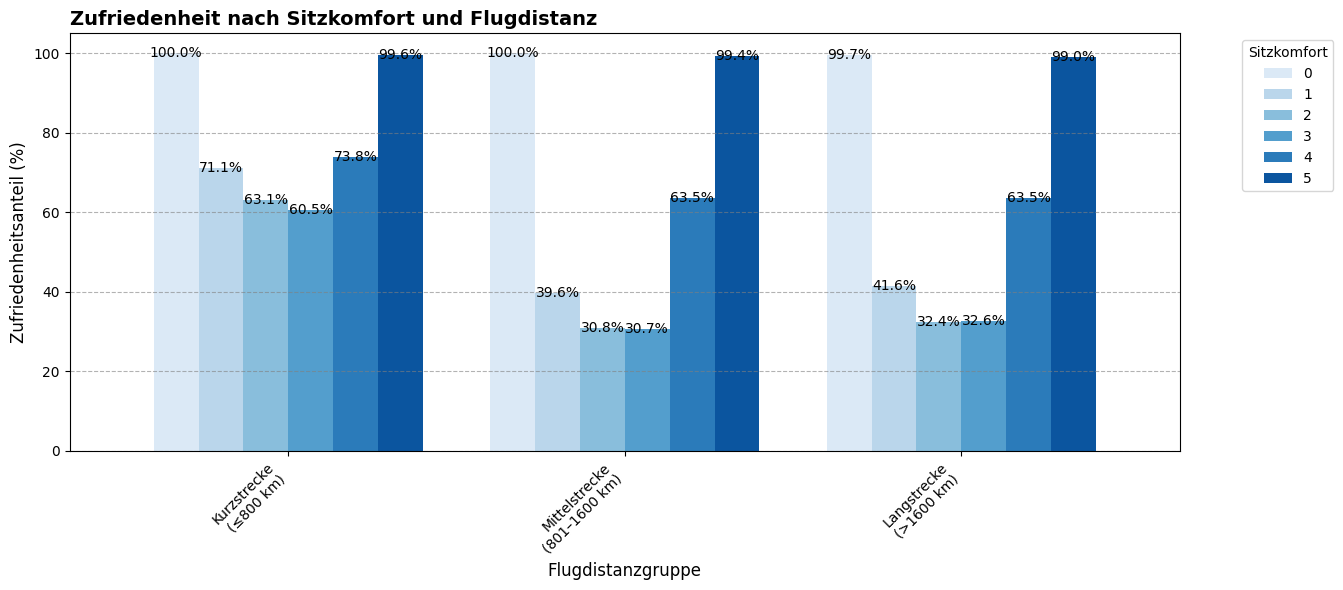

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daten einlesen und bereinigen
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)
df.dropna(subset=['satisfaction', 'Seat comfort', 'Flight Distance'], inplace=True)

# 2. Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# 3. Flugdistanz kategorisieren
bins = [0, 800, 1600, df['Flight Distance'].max()]
labels = ['Kurzstrecke\n(≤800 km)', 'Mittelstrecke\n(801–1600 km)', 'Langstrecke\n(>1600 km)']
df['flight_group'] = pd.cut(df['Flight Distance'], bins=bins, labels=labels, right=True)

# 4. Gruppieren nach Flugdistanz und Sitzkomfort
grouped = df.groupby(['flight_group', 'Seat comfort', 'satisfaction_binary']).size().unstack(fill_value=0)

# 5. In Prozent umwandeln
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 6. Daten für Balkendiagramm umstrukturieren
# Wir wollen den Anteil der zufriedenen Passagiere nach Sitzkomfort und Flugdistanz für das Balkendiagramm
grouped_percent_satisfied = grouped_percent.loc[:, 1].reset_index()
grouped_percent_satisfied['satisfaction_binary'] = 'Zufrieden'  # Label für die Zufriedenen

# Erstellen der Balkendiagramm-Daten für alle Sitzkomfort- und Flugdistanz-Kombinationen
plot_data = grouped_percent_satisfied.pivot(index='flight_group', columns='Seat comfort', values=1)

# Farbpalette für verschiedene Fluggruppen (Blautöne)
colors = sns.color_palette("Blues", len(plot_data.columns))

# 7. Balkendiagramm erstellen (nebeneinander)
ax = plot_data.plot(kind='bar', figsize=(12, 6), width=0.8, color=colors)

# Titel und Beschriftungen (IBCS-konform)
plt.title('Zufriedenheit nach Sitzkomfort und Flugdistanz', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Zufriedenheitsanteil (%)', fontsize=12)
plt.xlabel('Flugdistanzgruppe', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Achsen und Gitter (IBCS-konform)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.6)

# Prozentuale Werte an den Balken hinzufügen, mit heller Schriftfarbe auf dunklem Hintergrund
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black')

# Legende rechts anordnen (IBCS-konform)
plt.legend(title='Sitzkomfort', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<b>Frage: Sind loyale Passagiere zufriedener als unloyale Passagiere?</b>

<p style="font-size: 16px; line-height: 1.5;"> Ziel der Analyse ist es, den Zusammenhang zwischen Kundentreue und Zufriedenheit zu untersuchen.

Die Auswertung zeigt, dass loyale Passagiere einen höheren Anteil an Zufriedenheit aufweisen. 61,6% der loyalen Passagiere sind zufrieden, während der Anteil unzufriedener Kunden bei 38,4% liegt. Bei unloyalen Passagieren ist die Unzufriedenheit mit 76% deutlich höher, nur 24% dieser Gruppe sind zufrieden.

Diese Ergebnisse deuten darauf hin, dass eine bestehende Kundenbindung mit einer höheren Zufriedenheit einhergeht.
</p>

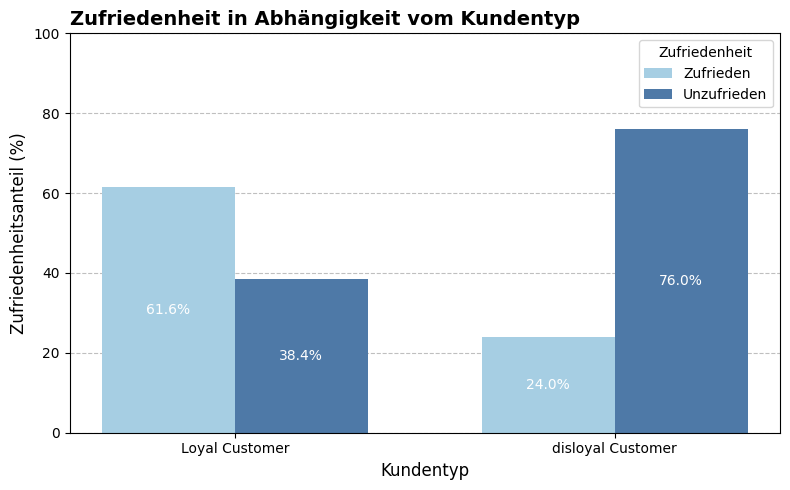

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Daten einlesen und bereinigen
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# Sicherstellen, dass keine fehlenden Werte für 'satisfaction' und 'Customer Type' vorliegen
df.dropna(subset=['satisfaction', 'Customer Type'], inplace=True)

# 2. Zufriedenheit binär kodieren
df['satisfaction_binary'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# 3. Gruppieren nach 'Customer Type' und 'satisfaction_binary'
grouped = df.groupby(['Customer Type', 'satisfaction_binary']).size().unstack(fill_value=0)

# 4. In Prozent umwandeln (Zufriedenheit)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 5. Balkendiagramm erstellen (nebeneinander statt gestapelt)
fig, ax = plt.subplots(figsize=(8, 5))

# x-Werte für die Balken
x = np.arange(len(grouped_percent.index))
width = 0.35  # Breite der Balken

# Balken für Zufriedene und Unzufriedene nebeneinander
bars1 = ax.bar(x - width/2, grouped_percent[1], width=width, label='Zufrieden', color='#A6CEE3')
bars2 = ax.bar(x + width/2, grouped_percent[0], width=width, label='Unzufrieden', color='#4E79A7')

# Achsen und Titel
ax.set_title('Zufriedenheit in Abhängigkeit vom Kundentyp', fontsize=14, fontweight='bold', loc='left')
ax.set_ylabel('Zufriedenheitsanteil (%)', fontsize=12)
ax.set_xlabel('Kundentyp', fontsize=12)
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(grouped_percent.index)

# Prozentuale Werte an den Balken hinzufügen
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        yval = bar.get_y() + height / 2 if bar.get_y() == 0 else bar.get_y() + height / 2
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white' if height > 10 else 'black')

# Legende und Layout
plt.legend(title='Zufriedenheit', loc='upper right')
plt.tight_layout()
plt.show()

<b>Frage: Hat eine hohe Bewertung der Gate-Lage einen Einfluss auf die allgemeine Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel der Analyse ist es, den Zusammenhang zwischen der Bewertung der Gate-Lage und der allgemeinen Zufriedenheit zu untersuchen.

Die vorliegende Grafik zeigt den Zusammenhang zwischen der Bewertung der Gate-Lage und dem Zufriedenheitsanteil der befragten Personen. Dabei wurden die Bewertungen von 1 (schlecht) bis 5 (sehr gut) betrachtet – die Bewertung 0 wurde aufgrund auffälliger und vermutlich fehlerhafter Daten aus der Analyse ausgeschlossen.

Auffällig ist, dass bereits bei den eher schlechten Bewertungen (1 und 2) ein relativ hoher Anteil der Passagiere zufrieden war: Bei einer Bewertung von 1 geben 61,1% an, zufrieden zu sein, bei Bewertung 2 sind es 58,0%. Dies könnte darauf hindeuten, dass trotz negativer Einschätzung der Gate-Lage andere Faktoren zu einer insgesamt positiven Wahrnehmung beigetragen haben.

Ab Bewertung 3 kehrt sich dieses Verhältnis um: Nur noch 46,3% der Passagiere sind zufrieden, während 53,7% unzufrieden sind. Auch bei Bewertung 4 bleibt die Zufriedenheit mit 49,8% unter der 50-Prozent-Marke.

Die höchste Zufriedenheit zeigt sich bei Bewertung 5, wo 65,6% der Befragten angeben, zufrieden zu sein. Dies bestätigt die Annahme, dass eine sehr gute Bewertung der Gate-Lage auch mit einer hohen allgemeinen Zufriedenheit einhergeht.

Insgesamt lässt sich aber trotzdem feststellen, dass es keinen durchgehend linearen Zusammenhang zwischen der Bewertung der Gate-Lage und der Zufriedenheit gibt. Besonders bei den mittleren Bewertungen (3 und 4) ist die Zufriedenheit überraschend niedrig, während sie bei Bewertung 1 vergleichsweise hoch ausfällt.

</p>

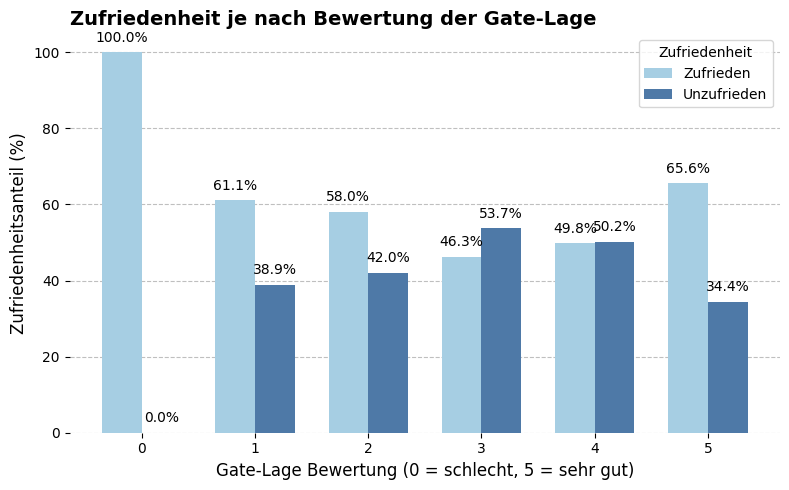

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# 2. Nur relevante Spalten, keine fehlenden Werte
df = df[['satisfaction', 'Gate location']].dropna()

# 3. Zufriedenheit binär gruppieren
df['satisfaction_label'] = df['satisfaction'].apply(lambda x: 'Zufrieden' if x == 'satisfied' else 'Unzufrieden')

# 4. Gruppieren nach Gate-Bewertung und Zufriedenheit
grouped = df.groupby(['Gate location', 'satisfaction_label']).size().unstack(fill_value=0)

# 5. In Prozent umwandeln
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 6. Visualisierung: Nebeneinanderstehende Balken
x = np.arange(len(grouped_percent.index))  # Gate location Stufen (0–5)
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Balken für Zufriedenheit und Unzufriedenheit nebeneinander
bars1 = ax.bar(x - width/2, grouped_percent['Zufrieden'], width=width, label='Zufrieden', color='#A6CEE3')
bars2 = ax.bar(x + width/2, grouped_percent['Unzufrieden'], width=width, label='Unzufrieden', color='#4E79A7')

# 7. Achsen & Layout
ax.set_title('Zufriedenheit je nach Bewertung der Gate-Lage', fontsize=14, fontweight='bold', loc='left')
ax.set_xlabel('Gate-Lage Bewertung (0 = schlecht, 5 = sehr gut)', fontsize=12)
ax.set_ylabel('Zufriedenheitsanteil (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(grouped_percent.index.astype(int))
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
ax.legend(loc='upper right', title='Zufriedenheit')

# 8. Beschriftung der Balken (Prozentwerte)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Layout optimieren
plt.tight_layout()
plt.box(False)
plt.show()


<b>Hat der On-board Service je nach Flugdauer einen unterschiedlichen Einfluss auf die Zufriedenheit?</b>

<p style="font-size: 16px; line-height: 1.5;">
Ziel der Analyse ist es, den Einfluss des On-board Services auf die Zufriedenheit in Abhängigkeit von der Flugdauer zu untersuchen.

Die Auswertung zeigt, dass eine positive Bewertung des On-board Services in allen Flugdistanzgruppen mit einem höheren Anteil zufriedener Passagiere einhergeht. Der Einfluss des On-board Services unterscheidet sich jedoch je nach Flugdauer. Bei einer sehr guten Bewertung des On-board Services (Bewertung 5) liegt der Zufriedenheitsanteil auf Kurzstrecken bei 95%, auf Mittelstrecken bei 72% und auf Langstrecken bei 73%. Bei einer mittleren Bewertung (3) beträgt der Anteil zufriedener Passagiere auf Langstrecken 40%, auf Mittelstrecken 38% und auf Kurzstrecken 53%. Bei niedrigen Bewertungen (0 bis 2) bleibt der Anteil der Zufriedenen in allen Gruppen unter 40%.

Die Ergebnisse deuten darauf hin, dass auf Kurzstrecken die Zufriedenheit besonders stark vom On-board Service beeinflusst wird, während bei Mittel- und Langstrecken auch andere Faktoren eine wichtige Rolle spielen könnten.
</p>

<ipython-input-15-79c951acc448>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([service_column, 'flight_group', 'satisfaction_label']).size().unstack(fill_value=0)


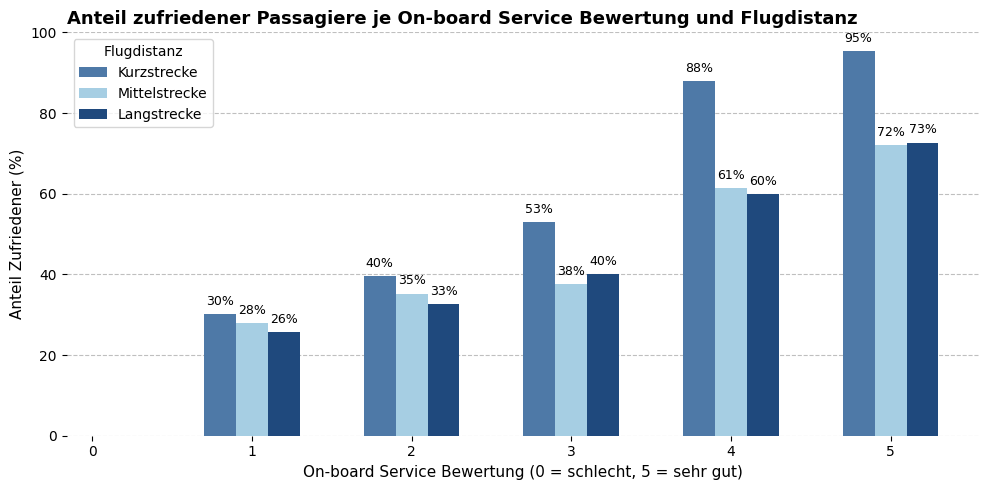

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Invistico_Airline.csv"
df = pd.read_csv(url)

# 2. Relevante Spalten definieren
service_column = 'On-board service'
df = df[['satisfaction', 'Flight Distance', service_column]].dropna()

# 3. Flugdistanz-Gruppen erstellen
bins = [0, 800, 1600, df['Flight Distance'].max()]
labels = ['Kurzstrecke', 'Mittelstrecke', 'Langstrecke']
df['flight_group'] = pd.cut(df['Flight Distance'], bins=bins, labels=labels, right=True)

# 4. Zufriedenheit binär abbilden
df['satisfaction_label'] = df['satisfaction'].apply(lambda x: 'Zufrieden' if x == 'satisfied' else 'Unzufrieden')

# 5. Gruppieren nach Servicebewertung & Flugdistanz
grouped = df.groupby([service_column, 'flight_group', 'satisfaction_label']).size().unstack(fill_value=0)

# 6. Prozentanteile berechnen (pro Service-Bewertung & Fluggruppe)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 7. Plot-Vorbereitung
service_levels = sorted(df[service_column].unique())
flight_groups = ['Kurzstrecke', 'Mittelstrecke', 'Langstrecke']
colors = {'Kurzstrecke': '#4E79A7', 'Mittelstrecke': '#A6CEE3', 'Langstrecke': '#1F497D'}

x = np.arange(len(service_levels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

# 8. Balken zeichnen (nur Anteil "Zufrieden")
for i, group in enumerate(flight_groups):
    percent_values = grouped_percent.xs(group, level='flight_group')['Zufrieden'].reindex(service_levels, fill_value=0)
    positions = x + (i - 1) * width
    bars = ax.bar(positions, percent_values, width=width, label=group, color=colors[group])

    # Beschriftung auf den Balken
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2, height + 1.5, f'{height:.0f}%', ha='center', va='bottom', fontsize=9, color='black')

# 9. Achsen & Layout
ax.set_title('Anteil zufriedener Passagiere je On-board Service Bewertung und Flugdistanz', fontsize=13, fontweight='bold', loc='left')
ax.set_xlabel('On-board Service Bewertung (0 = schlecht, 5 = sehr gut)', fontsize=11)
ax.set_ylabel('Anteil Zufriedener (%)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(service_levels)
ax.set_ylim(0, 100)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
ax.legend(title='Flugdistanz', loc='upper left')

plt.tight_layout()
plt.box(False)
plt.show()


<h3 style="color: black; text-align: left;"><b>Ergebnisse</b></h2>


<p style="font-size: 16px; line-height: 1.5;">
Die Auswertung zeigt, dass bestimmte Servicefaktoren einen signifikanten Einfluss auf die Kundenzufriedenheit haben. Diese lassen sich in positive und negative Einflussgrössen unterteilen.

Positive Einflussfaktoren (bei hoher Bewertung):

*   On-board Service: Der On-board Service hat den stärksten positiven Einfluss auf die Zufriedenheit. Insbesondere auf Kurzstrecken führt eine sehr gute Bewertung zu einem Zufriedenheitsanteil von bis zu 95%.
*   Sitzkomfort: Der Sitzkomfort spielt vor allem auf Mittel- und Langstrecken eine entscheidende Rolle. Bei einer hohen Bewertung liegt die Zufriedenheit bei bis zu 99%.
*   Check-in Service: Ein reibungsloser Check-in-Prozess beeinflusst die Zufriedenheit positiv. Bei einer Bewertung von 5 sind 74% der Passagiere zufrieden.
*   Gate-Lage: Eine gute Lage des Gates trägt ebenfalls zur positiven Wahrnehmung bei, mit einem Zufriedenheitsanteil von 65% bei bester Bewertung.
*   Pünktlichkeit: Flüge ohne oder mit nur geringen Verspätungen führen zu einer signifikant höheren Kundenzufriedenheit.
*   Kundentreue: Loyale Passagiere sind mit 61,6% deutlich zufriedener als unloyale Passagiere (24%).

Negative Einflussfaktoren (bei niedriger Bewertung):

*   Schlechter On-board Service: Eine geringe Bewertung des On-board Services führt insbesondere auf Langstrecken zu einem hohen Anteil unzufriedener Passagiere.
*   Geringer Sitzkomfort: Auf Mittel- und Langstreckenflügen wirkt sich niedriger Sitzkomfort besonders negativ aus.
*   Flugverspätungen: Verspätungen stellen einen der stärksten negativen Einflussfaktoren dar. Mit zunehmender Verspätungsdauer steigt die Unzufriedenheit deutlich an.
*   Negatives Check-in Erlebnis: Bei einer sehr schlechten Bewertung des Check-in-Prozesses (Bewertung 0) liegt die Unzufriedenheit bei 100%.
*   Ungünstige Gate-Lage: Eine ungünstige Lage des Gates wirkt sich ebenfalls negativ auf die Gesamtzufriedenheit aus.
*   Unloyale Passagiere: Diese Kundengruppe zeigt einen hohen Unzufriedenheitsanteil von 76%.

Die Analyse macht deutlich, dass sowohl positive Erlebnisse als auch negative Erfahrungen einen starken Einfluss auf die Gesamtzufriedenheit der Passagiere haben. Besonders auffällig ist, dass negative Erlebnisse – wie Verspätungen, ein schlechter On-board Service oder ein negativer Check-in – eine deutlich stärkere Wirkung entfalten als positive Erlebnisse.

Daraus lässt sich ableiten, dass die Invistico Airline neben der kontinuierlichen Verbesserung von Serviceleistungen insbesondere darauf achten sollte, negative Erlebnisse entlang der Customer Journey zu minimieren. Dies betrifft insbesondere den Bereich der Pünktlichkeit sowie die Qualität des On-board Services und den Komfort bei Mittel- und Langstreckenflügen.
</p>


<h2 style="color: black; text-align: left;"><b>4.2. Analysen und Erkenntnisse zum sekundären Datensatz: Einflussfaktoren auf Flugverspätungen</b></h2>

<p style="font-size: 16px; line-height: 1.5;"> Die in Kapitel 4.1 durchgeführte Auswertung hat gezeigt, dass Flugverspätungen einen der stärksten negativen Einflussfaktoren auf die Kundenzufriedenheit darstellen. Bereits geringe Verspätungen wirken sich spürbar negativ auf die Wahrnehmung des gesamten Reiseerlebnisses aus, während längere Verspätungen die Unzufriedenheit der Passagiere deutlich verstärken.

Vor diesem Hintergrund wird in diesem Kapitel untersucht, welche Faktoren massgeblich zur Entstehung von Flugverspätungen beitragen. Ziel der Analyse ist es, die Ursachen für Verspätungen systematisch zu identifizieren, um daraus gezielte Massnahmen zur Reduktion von Verzögerungen ableiten zu können und damit die Kundenzufriedenheit nachhaltig zu verbessern.</p>

<h3 style="color: black; text-align: left;"><b>Auswertung</b></h2>

<p style="font-size: 16px; line-height: 1.5;">Zunächst werden die Daten für die Analyse geladen
</p>

In [ ]:
# Datensätze von Kaggle herunterladen
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path_zufriedenheit = "Invistico_Airline.csv"
file_path_airlines_delay = "airlines_delay.csv"
file_path_crowded_airports = "Airports.csv"

# Kundenzufriedenheit
df_zufriedenheit = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path_zufriedenheit,
)

# Verspätungen
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path_airlines_delay,
)

# Flughäfen
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path_crowded_airports,
)

# Daten laden
url = "https://raw.githubusercontent.com/DivinitasMaxima/BINA-REPO/refs/heads/main/data/data/Distance_of_All_Airports.csv"
df_distance_ap = pd.read_csv(url)

<ipython-input-2-41b589dc4c92>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_zufriedenheit = kagglehub.load_dataset(
<ipython-input-2-41b589dc4c92>:18: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_airlines_delay = kagglehub.load_dataset(
<ipython-input-2-41b589dc4c92>:25: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_crowded_airports = kagglehub.load_dataset(


<h3 style="color: black; text-align: left;"><b>Sekundäre Datensätze</b></h3>
Nun soll der sekundäre Datensatz der Verspätungen, um die Spalten der Anzahl an Personenaufkommen im Abflugs-Flughafen und Ziel-Flughafen, sowie der Distanz der entsprechenden Strecke ergänzt werden.

In [ ]:
# Unterteilung einer Spalte auf zwei neue Spalten
df_crowded_airports[['IATA', 'ICAO']] = df_crowded_airports['Code'].str.split('/', n=1, expand=True)
#df_crowded_airports

# df_airlines_delay und df_crowded_airports verbinden
# Merge "Passenger" für "AirportFrom"
merged_df_from = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportFrom', right_on='IATA', how='left')
df_airlines_delay['AirportFromCrowd'] = merged_df_from['Passengers']

# Merge "Passenger" für "AirportTo"
merged_df_to = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportTo', right_on='IATA', how='left')
df_airlines_delay['AirportToCrowd'] = merged_df_to['Passengers']
#df_airlines_delay

#df_distance_ap und df_airlines_delay verbinden
df_zwischenstand = df_airlines_delay.merge(df_distance_ap, left_on=['AirportFrom', 'AirportTo'],
                      right_on=['ORIGIN', 'DEST'], how='left')

#nur die gewünschten spalten übernehmen
df_merge_erledigt = df_zwischenstand[['Flight','Time','Length','Airline','AirportFrom','AirportTo','DayOfWeek','Class','AirportFromCrowd','AirportToCrowd','DISTANCE IN MILES']]
df_merge_erledigt

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,AirportFromCrowd,AirportToCrowd,DISTANCE IN MILES
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,42918685.0,NaN,696.0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,110531300.0,30860251.0,911.0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,107394029.0,84372618.0,728.0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,103902992.0,83339186.0,2845.0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,104171935.0,79828183.0,533.0
...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,103902992.0,NaN,224.0
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,104171935.0,NaN,628.0
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,NaN,16484132.0,192.0
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,NaN,33741129.0,281.0


An dieser Stelle sind alle Datensätze zusammengefügt und werden nun bereinigt.

In [ ]:
# Fehlende Werte analysieren
print(df_merge_erledigt.isnull().sum())

# Bereinigt
df_merge_erledigt = df_merge_erledigt.dropna()
print(df_merge_erledigt.isnull().sum())

Flight                    0
Time                      0
Length                    0
Airline                   0
AirportFrom               0
AirportTo                 0
DayOfWeek                 0
Class                     0
AirportFromCrowd     110730
AirportToCrowd       109825
DISTANCE IN MILES      7792
dtype: int64
Flight               0
Time                 0
Length               0
Airline              0
AirportFrom          0
AirportTo            0
DayOfWeek            0
Class                0
AirportFromCrowd     0
AirportToCrowd       0
DISTANCE IN MILES    0
dtype: int64


Nun kann mit der Analyse und Visualisierungen fortgefahren werden.
Zunächst wird eine Verspätungsrate berechnet indem der Mittelwert der Spalte "Classe" für jede Gruppe von AirportFrom ermittelt wird. Anschliessend werden die Top 10 Flughäfen dargestellt und entsprechend angeordnet.

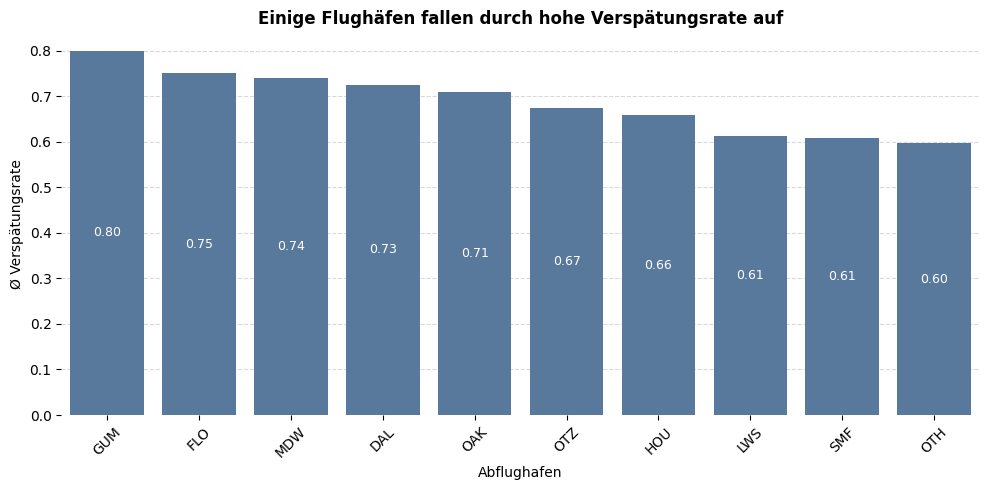

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Durchschnittliche "Verspätungsrate" pro Abflughafen (angenommen: Class=1 → verspätet)
airport_delay = df_merge_erledigt.groupby("AirportFrom")["Class"].mean()

# Top 10 mit höchster Verspätungsrate
top10_airports = airport_delay.sort_values(ascending=False).head(10)

# Einheitliche Farbe (IBCS-konform: neutrale Töne)
color_ibcs = '#4E79A7'  # alternativ: '#A2A2A2' für neutrales Grau

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top10_airports.index, y=top10_airports.values, color=color_ibcs)

# Titel: kurz, prägnant, "Message Title"
ax.set_title('Einige Flughäfen fallen durch hohe Verspätungsrate auf', fontsize=12, fontweight='bold')

# Achsenbeschriftung
ax.set_xlabel("Abflughafen", fontsize=10)
ax.set_ylabel("Ø Verspätungsrate", fontsize=10)

# IBCS-konforme Darstellung
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.3)
plt.box(False)
plt.xticks(rotation=45)

# Wertebeschriftung zentriert im Balken
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height/2,
            f'{height:.2f}', ha='center', va='center',
            fontsize=9, color='white')

plt.tight_layout()
plt.show()


Die Auswertung weisst darauf hin, dass folgende Flughären eine erhöhte Verpätungsrate aufweisen:

<ol>
    <li>GUM	Internationaler Flughafen „Antonio B. Won Pat“, Hagåtña, Guam, Vereinigte Staaten</li>
    <li>FLO	Florence Regional Airport, Florence, South Carolina, Vereinigte Staaten</li>
    <li>MDW	Chicago (Midway Airport), Chicago, Illinois, USA</li>
    <li>DAL	Flughafen Dallas Love Field, Dallas, Texas, Vereinigte Staaten</li>
    <li>OAK	Oakland International Airport, Oakland, Kalifornien, USA</li>
    <li>OTZ	Kotzebue-Ralph Wien, Kotzebue, Alaska, USA</li>
    <li>HOU	Flughafen „William P. Hobby“, Houston, Texas, Vereinigte Staaten</li>
    <li>LWS	Lewiston-Nez Perce County Airport, Lewiston, Idaho, USA</li>
    <li>SMF	Flughafen Sacramento, Sacramento, Kalifornien, USA</li>
    <li>OTH	North Bend Municipal Airport, North Bend, Oregon, USA</li>
</ol>

Nun werden die Tage näher betrachtet:


<ipython-input-9-43f9fbf64479>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_erledigt["DayName"] = df_merge_erledigt["DayOfWeek"].map(day_mapping)
<ipython-input-9-43f9fbf64479>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="DayName", y="Class", data=df_merge_erledigt, ci=None,


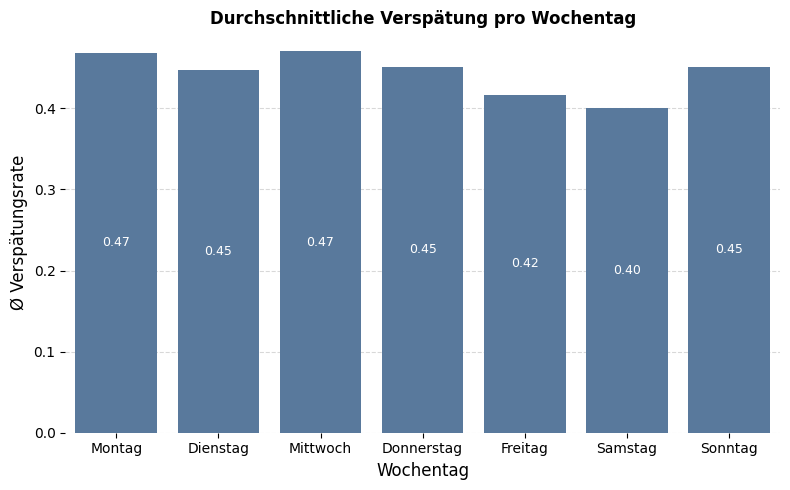

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping: Zahlen zu Wochentagen
day_mapping = {1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag", 5: "Freitag", 6: "Samstag", 7: "Sonntag"}
df_merge_erledigt["DayName"] = df_merge_erledigt["DayOfWeek"].map(day_mapping)

# Richtige Reihenfolge der Wochentage
day_order = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]

# Farblich neutral (IBCS-konform)
color_ibcs = "#4E79A7"

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="DayName", y="Class", data=df_merge_erledigt, ci=None,
                 order=day_order, color=color_ibcs)

# IBCS-Layout
ax.set_title("Durchschnittliche Verspätung pro Wochentag", fontsize=12, fontweight='bold')
ax.set_xlabel("Wochentag", fontsize=12)
ax.set_ylabel("Ø Verspätungsrate", fontsize=12)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.3)
plt.box(False)

# Zentrierte Balkenbeschriftung
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height / 2,
            f'{height:.2f}', ha='center', va='center',
            fontsize=9, color='white')

plt.tight_layout()
plt.show()


Die Verspätungsraten variieren im Verlauf der Woche, wobei Anfang und Mitte der Woche (insbesondere Montag und Mittwoch) die höchsten Werte aufweisen, während das Wochenende, vor allem der Samstag, relativ geringere Verspätungsanteile zeigt.

Nun sollen die Wochentage näher betrachtet werden.

<ipython-input-1-975eee4a513e>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_delays = kagglehub.load_dataset(


100%|██████████| 5.85M/5.85M [00:00<00:00, 68.9MB/s]

Extracting zip of airlines_delay.csv...


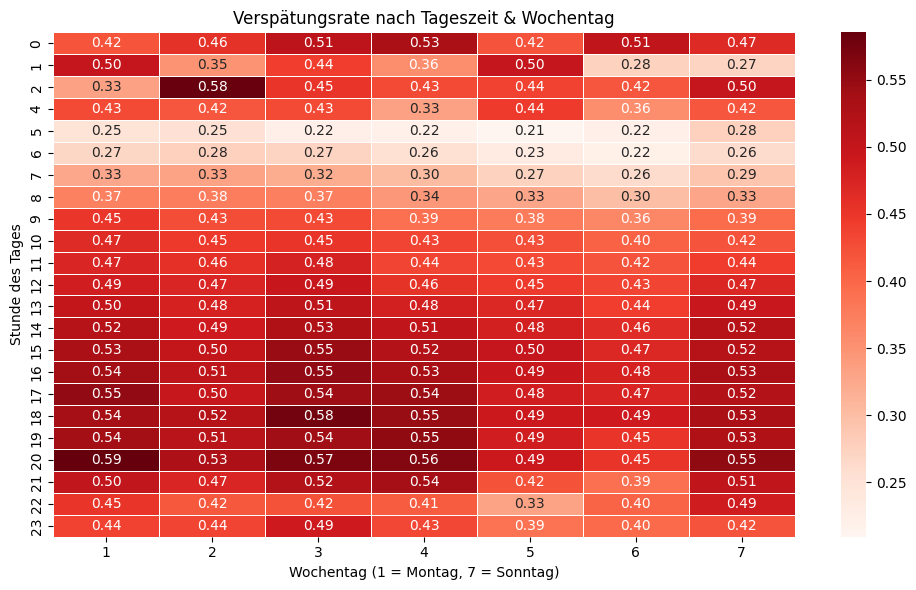

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Datensatz laden
file_path = "airlines_delay.csv"
df_delays = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ulrikthygepedersen/airlines-delay",
    file_path,
)

df_delays = df_delays[df_delays["Time"].notna()]

# ✅ Zeit in Stunden seit Mitternacht berechnen (z. B. 90 min → 1.5 Std)
df_delays["Hour"] = (df_delays["Time"] / 60).astype(int)

# ✅ Gruppieren nach Wochentag und Stunde
heatmap_data = df_delays.pivot_table(
    index="Hour",
    columns="DayOfWeek",
    values="Class",  # 1 = verspätet, 0 = pünktlich
    aggfunc="mean"
)

# ✅ Heatmap anzeigen
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Wochentag (1 = Montag, 7 = Sonntag)")
plt.ylabel("Stunde des Tages")
plt.title("Verspätungsrate nach Tageszeit & Wochentag")
plt.tight_layout()
plt.show()

Die Analyse der Verspätungsrate nach Tageszeit und Wochentag zeigt deutlich, dass die Verspätungsraten über den Tag hinweg schwanken, wobei insbesondere am späten Nachmittag und Abend eine höhere Verspätung zu beobachten ist. Die höchsten Verspätungsraten treten gegen 17:00 bis 21:00 Uhr auf, was auf die Zunahme der Flugauslastung und mögliche Wetterbedingungen in dieser Zeit hindeutet. Es zeigt sich auch, dass die Verspätungsrate an Wochenenden tendenziell etwas niedriger ist, wobei der Samstag mit der geringsten Verspätung auftritt. Insgesamt lassen sich keine extremen Unterschiede zwischen den Wochentagen erkennen, jedoch steigen die Verspätungen tendenziell an den späteren Tagen der Woche.

Nun wird noch die durchschnittliche Verspätungsrate pro Stunde betrachtet.

<ipython-input-9-0d5ce946a1d2>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_delays = kagglehub.load_dataset(


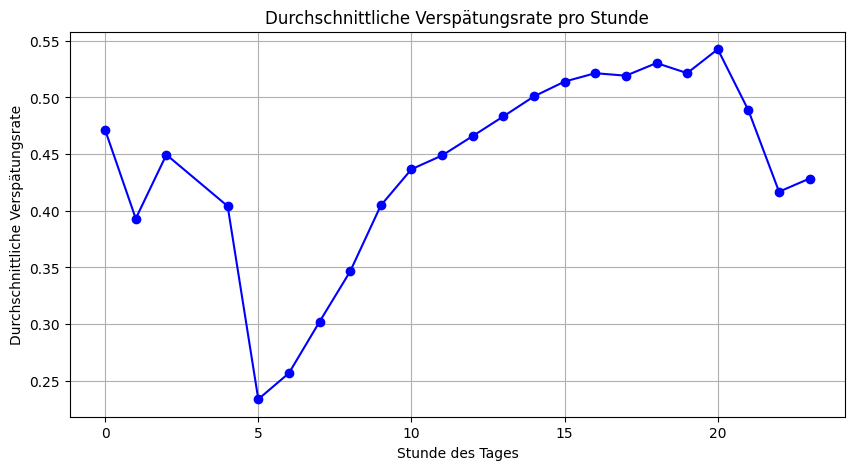

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "airlines_delay.csv"

# Die letzte Version des Datensatzes laden
df_delays = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path,
)

df_delays = df_delays[df_delays["Time"].notna()]

# ✅ Zeit in Stunden seit Mitternacht berechnen (z. B. 90 min → 1.5 Std)
df_delays["Hour"] = (df_delays["Time"] / 60).astype(int)

# Liniendiagramm: Durchschnittliche Verspätung je Stunde
plt.figure(figsize=(10, 5))
# Use df_delays instead of df
df_delays.groupby("Hour")["Class"].mean().plot(kind="line", marker="o", color="blue")
plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche Verspätungsrate")
plt.title("Durchschnittliche Verspätungsrate pro Stunde")
plt.grid(True)
plt.show()

Die Analyse zeigt die durchschnittliche Verspätungsrate pro Stunde und verdeutlicht, dass die Verspätungsrate im Tagesverlauf eine deutliche Veränderung durchläuft. Am frühen Morgen (zwischen 0:00 und 5:00 Uhr) ist die Verspätungsrate relativ gering, mit einem markanten Anstieg gegen 6:00 Uhr, der bis etwa 16:00 Uhr kontinuierlich zunimmt. Ab den späteren Nachmittagsstunden bis zum Abend (16:00 bis 21:00 Uhr) steigt die Verspätungsrate stetig und erreicht ihren Höhepunkt gegen 20:00 Uhr, mit einer durchschnittlichen Verspätung von über 0,50.

Folgend soll ein Vergleich der Abflugzeiten gezeigt werden.

<ipython-input-11-4e987f2c07f4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["Time"], palette="coolwarm")


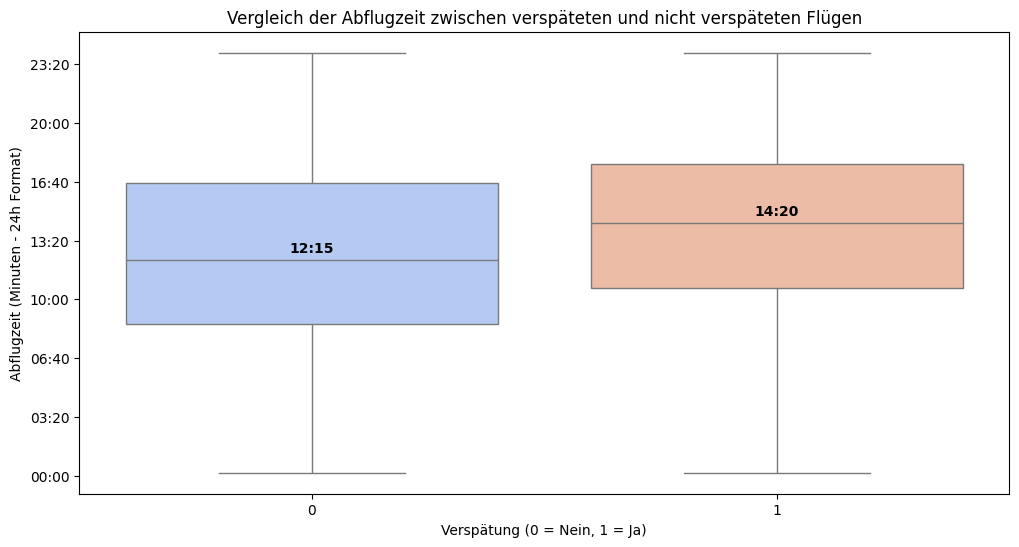

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Funktion, die Minuten in ein HH:MM-Format umwandelt
def minutes_to_time(x):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

plt.figure(figsize=(12, 6))
# Hinweis: Wenn du nur x und y (ohne hue) angibst, kannst du palette beibehalten –
# falls es zu einer Warnung kommt, ignoriere sie oder setze legend=False.
ax = sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["Time"], palette="coolwarm")

plt.title("Vergleich der Abflugzeit zwischen verspäteten und nicht verspäteten Flügen")
plt.xlabel("Verspätung (0 = Nein, 1 = Ja)")
plt.ylabel("Abflugzeit (Minuten - 24h Format)")

# y-Achsen-Tick-Labels in HH:MM umwandeln
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: minutes_to_time(x)))

# Berechne und annotiere den Median für jede Kategorie (0 und 1)
classes = sorted(df_merge_erledigt["Class"].unique())
for i, cls in enumerate(classes):
    median_val = df_merge_erledigt[df_merge_erledigt["Class"] == cls]["Time"].median()
    ax.annotate(f'{minutes_to_time(median_val)}',
                xy=(i, median_val),          # Position des Medians
                xytext=(0, 3),               # Verschiebung (0 horizontal, 3 Punkte nach oben)
                textcoords='offset points',  # Relativer Offset
                ha='center', va='bottom',
                color='black', weight='bold', fontsize=10)

plt.show()

Betrachtet man die Mediane und deren Verschiebung beim Vergleich, legt diese nahe, dass Flüge, die später am Tag starten, häufiger verspätet sind. Ein möglicher Einflussgrund könnte sein, dass sich Verspätungen manchmal im Tagesverlauf akkumulieren oder dass betriebliche Herausforderungen bei späten Abflügen stärker ins Gewicht fallen.
Flüge, die später starten, haben möglicherweise die Nachwirkungen von zuvor aufgetretenen Verspätungen, die sich im Tagesverlauf verstärken. Es können aber auch vermehrt logistische oder technische Probleme im Verlaufe des Tages auftreten.

Nun sollten die Flugdistanzen zwischen den verspäteten und nicht verspäteten Flügen verglichen werden.

<ipython-input-12-162566cb3d8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["DISTANCE IN MILES"], palette="coolwarm")


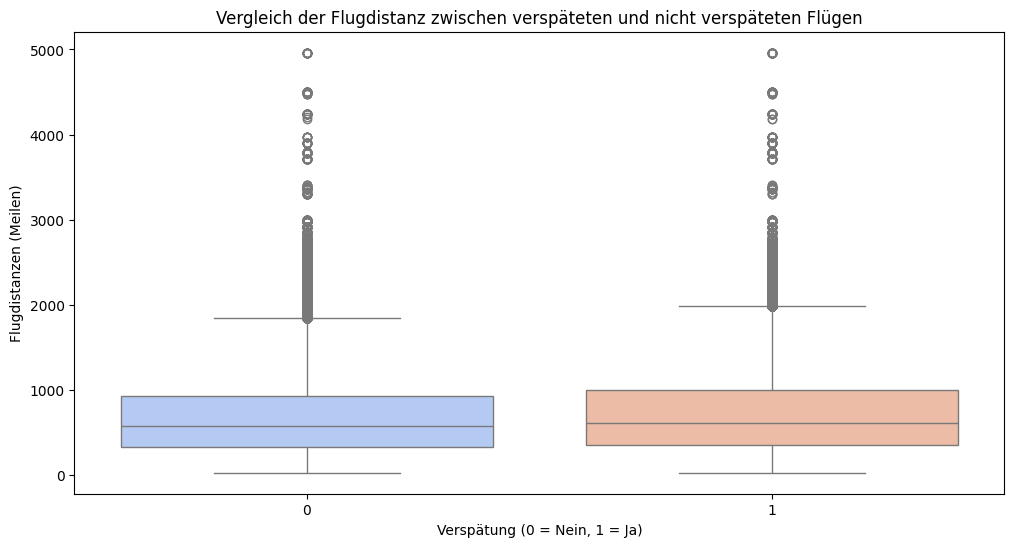

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_merge_erledigt["Class"], y=df_merge_erledigt["DISTANCE IN MILES"], palette="coolwarm")
plt.title("Vergleich der Flugdistanz zwischen verspäteten und nicht verspäteten Flügen")
plt.xlabel("Verspätung (0 = Nein, 1 = Ja)")
plt.ylabel("Flugdistanzen (Meilen)")
plt.show()

Erkenntnis

In [ ]:
# Kombinieren von Start- und Zielflughäfen zu einer neuen Spalte "Route"
df_merge_erledigt['Route'] = df_merge_erledigt['AirportFrom'] + ' → ' + df_merge_erledigt['AirportTo']
#df_merge_erledigt


<ipython-input-18-de0740505261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_erledigt['Route'] = df_merge_erledigt['AirportFrom'] + ' → ' + df_merge_erledigt['AirportTo']


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,AirportFromCrowd,AirportToCrowd,DISTANCE IN MILES,DayName,Route
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,110531300.0,30860251.0,911.0,Donnerstag,COS → ORD
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,107394029.0,84372618.0,728.0,Mittwoch,BOS → CLT
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,103902992.0,83339186.0,2845.0,Samstag,OGG → PHX
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,104171935.0,79828183.0,533.0,Donnerstag,BMI → ATL
10,1147.0,1103.0,121.0,FL,CRW,MCO,4,0,15892892.0,44422022.0,686.0,Donnerstag,CRW → MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539368,2296.0,1035.0,168.0,DL,MSP,LGA,1,1,42918685.0,107394029.0,1020.0,Montag,MSP → LGA
539369,852.0,865.0,337.0,AS,HNL,SEA,6,1,110531300.0,103902992.0,2677.0,Samstag,HNL → SEA
539370,2130.0,840.0,66.0,US,LGA,BOS,1,1,107394029.0,104171935.0,184.0,Montag,LGA → BOS
539375,769.0,480.0,287.0,CO,LAS,EWR,2,1,110531300.0,16484132.0,2227.0,Dienstag,LAS → EWR


<ipython-input-19-0119f84852cd>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)
<ipython-input-19-0119f84852cd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)


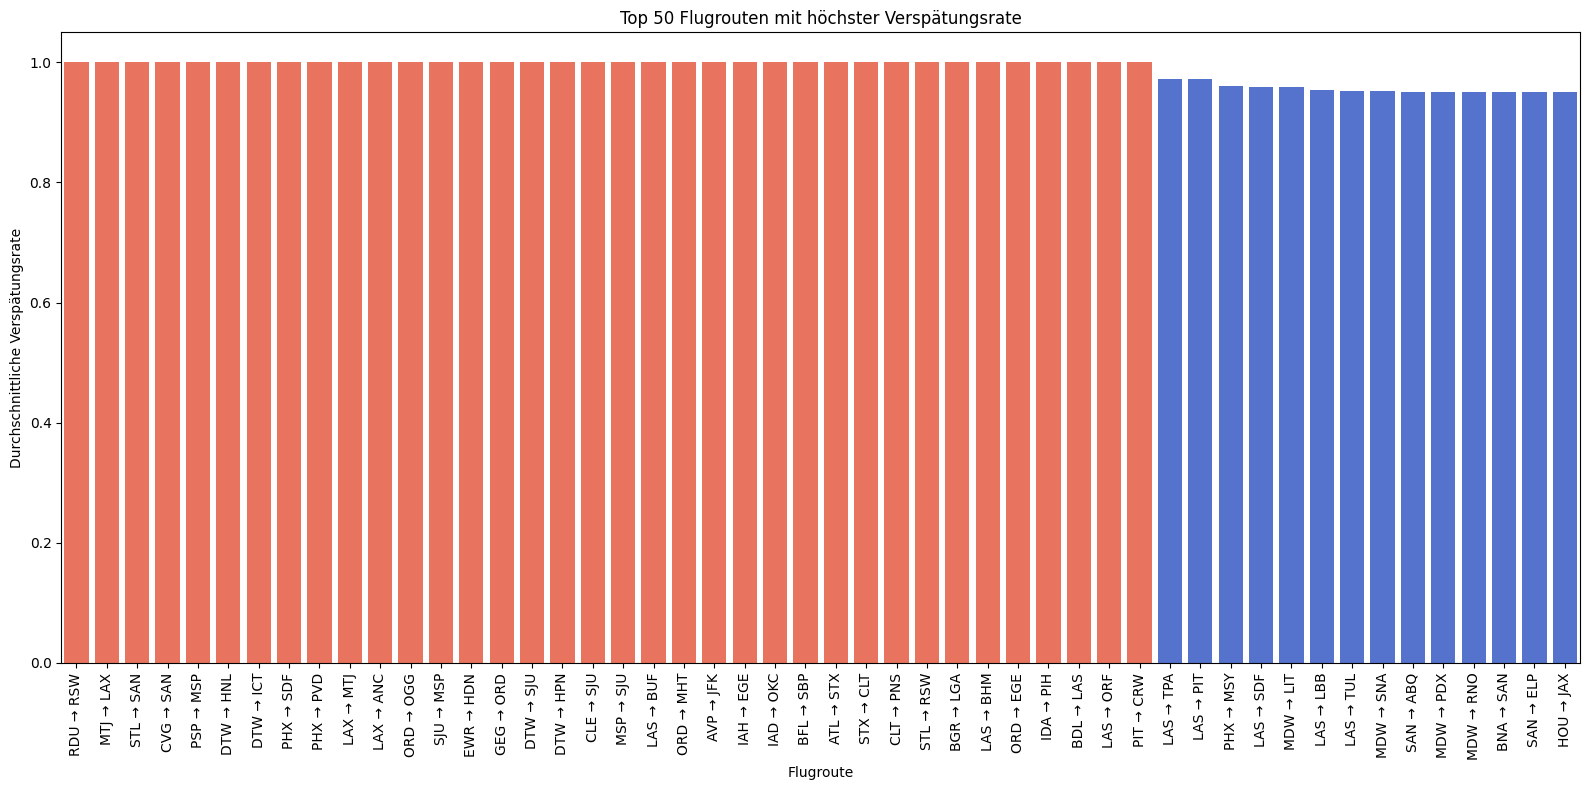

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Berechne die durchschnittliche Verspätungsrate pro Flugroute
route_delay = df_merge_erledigt.groupby("Route")["Class"].mean()

# Sortiere die Routen absteigend und wähle die Top 50 aus
top50_routes = route_delay.sort_values(ascending=False).head(50)

# Erstelle eine Liste von Farben: Rot für Routen mit Rate == 1, ansonsten Blau
colors = ['tomato' if val == 1.0 else 'royalblue' for val in top50_routes.values]

# Visualisiere die Top 50 Flugrouten mit der entsprechenden Farbgebung
plt.figure(figsize=(16, 8))  # Größere Figure, um die vielen x-Achsen-Beschriftungen unterzubringen
sns.barplot(x=top50_routes.index, y=top50_routes.values, ci=None, palette=colors)
plt.xticks(rotation=90)
plt.title("Top 50 Flugrouten mit höchster Verspätungsrate")
plt.xlabel("Flugroute")
plt.ylabel("Durchschnittliche Verspätungsrate")
plt.tight_layout()  # Optimiert das Layout, damit nichts abgeschnitten wird
plt.show()

<h3 style="color: black; text-align: left;"><b>Ergebnisse</b></h2>

<p style="font-size: 16px; line-height: 1.5;">Die durchgeführten Analysen in diesem Notebook konzentrieren sich auf die Identifizierung und Auswertung der Faktoren, die massgeblich zur Entstehung von Flugverspätungen beitragen. Die Analyse der Verspätungsdaten zeigt mehrere interessante Muster, die für die Optimierung der Betriebsabläufe von Fluggesellschaften entscheidend sind:

*   Bestimmte Flughäfen weisen signifikant höhere Verspätungsraten auf. Flughäfen wie GUM (80%), FLO (75%) und MDW (74%) gehören zu den Spitzenreitern in Bezug auf Verspätungen. Diese Flughäfen sollten verstärkt überwacht und gezielte Massnahmen zur Verbesserung der Pünktlichkeit ergriffen werden.

*   Die durchschnittliche Verspätung pro Wochentag zeigt, dass es keine dramatischen Unterschiede zwischen den Tagen gibt, jedoch sind leichte Schwankungen zu beobachten. Montag und Mittwoch verzeichnen mit jeweils 0.47 die höchste durchschnittliche Verspätung, während Samstag mit 0.40 den niedrigsten Wert aufweist. Dies könnte auf eine höhere Auslastung und logistische Herausforderungen zu Beginn der Woche hinweisen.

*   Die Verspätungen nehmen im Laufe des Tages zu, insbesondere zwischen 16:00 und 21:00 Uhr. Diese Zunahme könnte durch die steigende Passagieranzahl und längere Wartezeiten an den Flughäfen sowie wetterbedingte Verzögerungen und eine reduzierte Personalverfügbarkeit am Nachmittag und Abend erklärt werden.

*   Flüge, die später abfliegen, sind tendenziell auch häufiger verspätet. Der durchschnittliche Abflugzeitpunkt für verspätete Flüge liegt bei etwa 14:20 Uhr, was auf eine Verzögerung am Nachmittag hinweist. Diese späten Abflüge führen oft zu weiteren Verzögerungen, die sich bis in den Abend ziehen.

*   Längere Flüge, insbesondere internationale Strecken, haben eine höhere Verspätungsrate. Dies ist darauf zurückzuführen, dass längere Flüge durch komplexere logistische Herausforderungen, längere Bearbeitungszeiten und wetterbedingte Störungen stärker beeinträchtigt werden. Internationale Flüge sind zusätzlich durch Sicherheitskontrollen und Zeitverschiebungen anfälliger für Verspätungen.

Zusammenfassend lässt sich sagen, dass Fluggesellschaften durch das gezielte Verständnis dieser Muster ihre Betriebsabläufe optimieren können. Insbesondere an Flughäfen mit hohen Verspätungsraten und zu den Stosszeiten sollten spezifische Massnahmen ergriffen werden. Auch für längere Flüge und internationale Strecken sollten Anpassungen in der Planung und Logistik vorgenommen werden, um Verzögerungen zu minimieren und die Kundenzufriedenheit zu steigern.
</p>